In [21]:
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv("data/anagraficapazientiattivi.csv", header=0, index_col=0)

In [23]:
df["age"] = 2021 - df["annonascita"]
df.loc[df["annodecesso"] > 0, "age"] = df["annodecesso"] - df["annonascita"]
df["age_group"] = pd.cut(
    df["age"],
    bins=[0, 50, 60, 70, 80, 90, 100, 120],
    labels=["0-50", "51-60", "61-70", "71-80", "81-90", "91-100", "101-120"],
)
# print(df)

age_group
0-50        7416
51-60      21883
61-70      49352
71-80      76163
81-90      68854
91-100     24260
101-120     2058
Name: count, dtype: int64


<Axes: title={'center': 'Age group of patients'}, xlabel='Age group'>

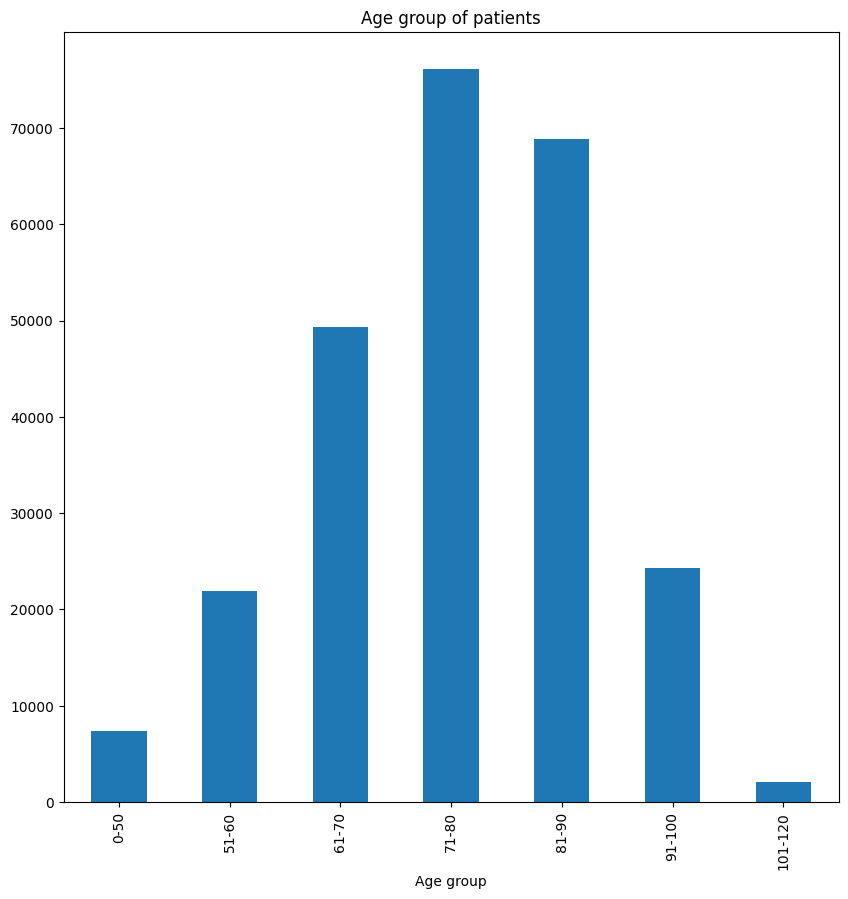

In [24]:
# plot number of patients by age group calculating the age by subtracting the year of birth from the current year or if present the year of death
print(df["age_group"].value_counts().sort_index())
df["age_group"].value_counts().sort_index().plot(
    kind="bar", title="Age group of patients", xlabel="Age group", figsize=(10, 10)
)
# plt.savefig("images/age_group.svg")

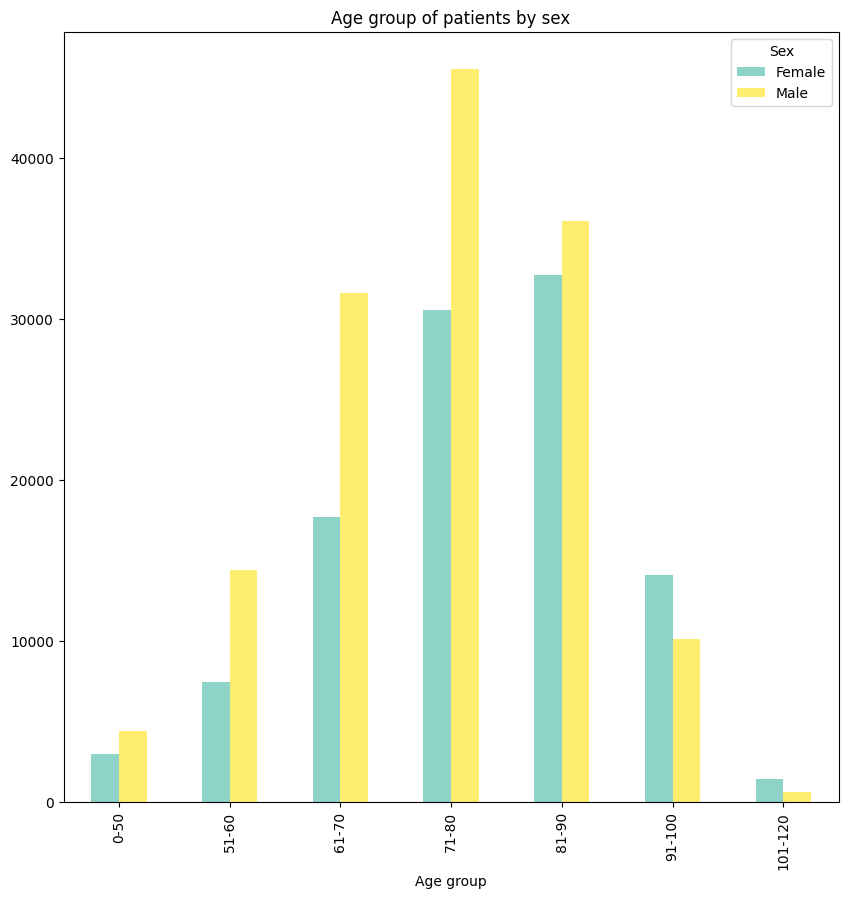

In [25]:
# plot number of patients by age group and sex with a legend
df.groupby(["age_group", "sesso"])["sesso"].count().unstack().plot(
    kind="bar",
    title="Age group of patients by sex",
    colormap="Set3",
    figsize=(10, 10),
    xlabel="Age group",
)
plt.legend(labels=["Female", "Male"], title="Sex")
# plt.savefig("images/age_group_by_sex.svg")

<Axes: title={'center': 'Percentage of patients by idcentro'}, ylabel='count'>

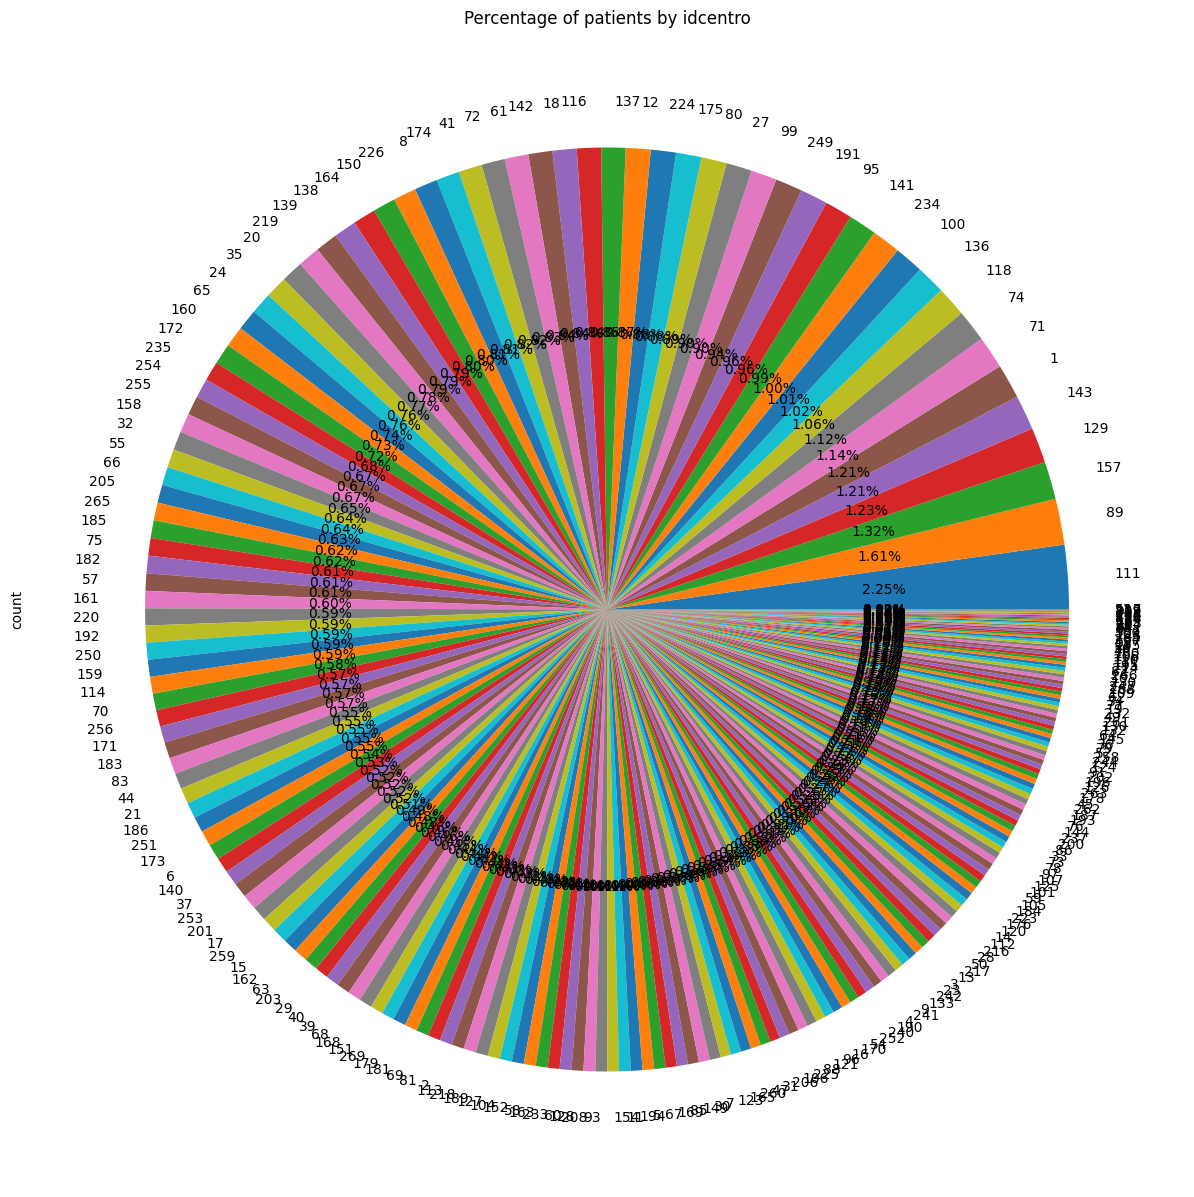

In [26]:
# plot percentage of patient by idcentro with labels that follow the pie slices
df["idcentro"].value_counts().plot(
    kind="pie",
    title="Percentage of patients by idcentro",
    autopct="%.2f%%",
    figsize=(15, 15),
)

<Axes: title={'center': 'Number of patients by idcentro'}, xlabel='ID of medical center'>

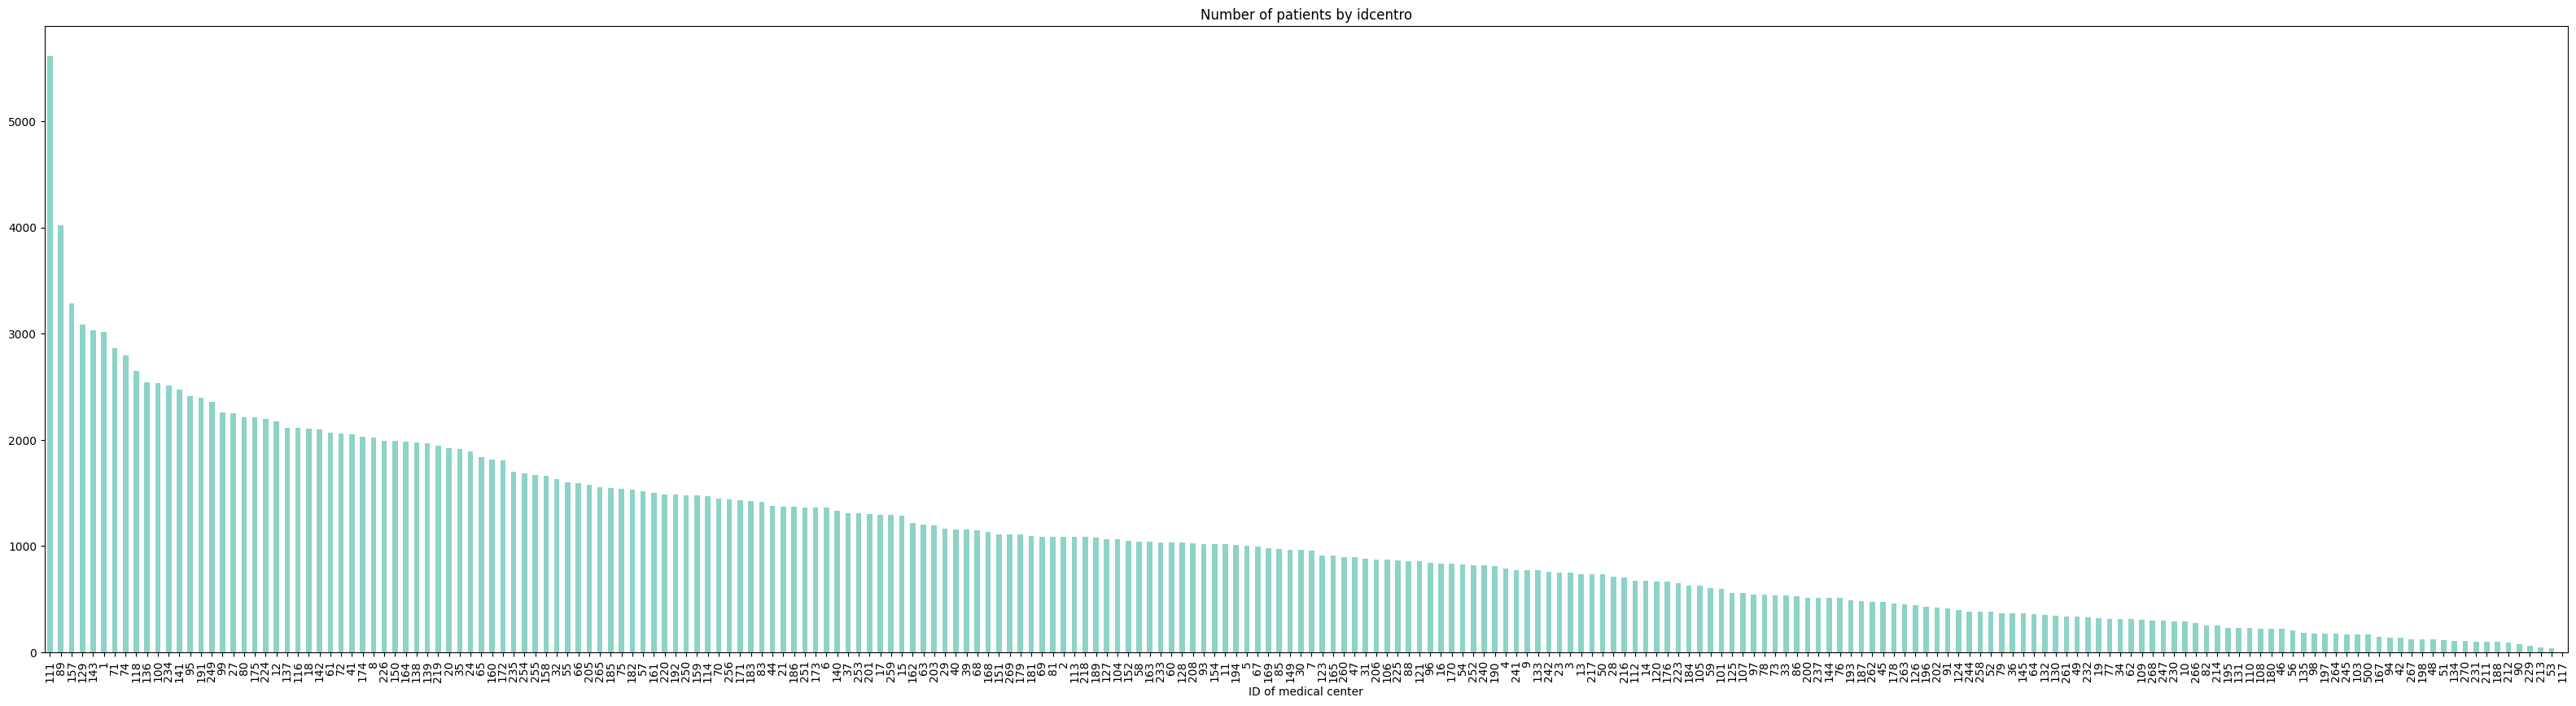

In [27]:
# plot number of patient by idcentro
df["idcentro"].value_counts().plot(
    kind="bar",
    title="Number of patients by idcentro",
    colormap="Set3",
    figsize=(40, 10),
    xlabel="ID of medical center",
)
# plt.savefig("images/patient_by_idcentro.svg")

<Axes: title={'center': 'Number of patients by sex'}, xlabel='sesso'>

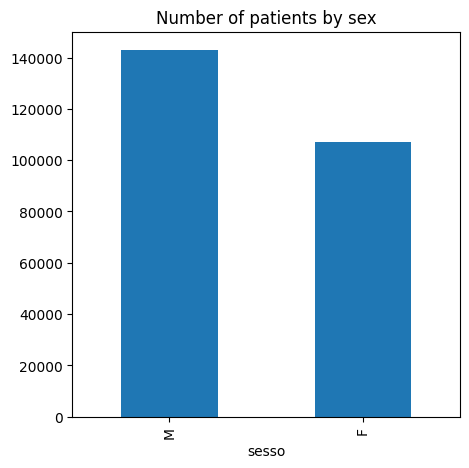

In [28]:
df["sesso"].value_counts().plot(
    kind="bar",
    title="Number of patients by sex",
    figsize=(5, 5),
)

In [29]:
df1 = pd.read_csv("data/diagnosi.csv", header=0, index_col=0)

<Axes: title={'center': 'Number of patients by codiceamd'}, xlabel='codiceamd'>

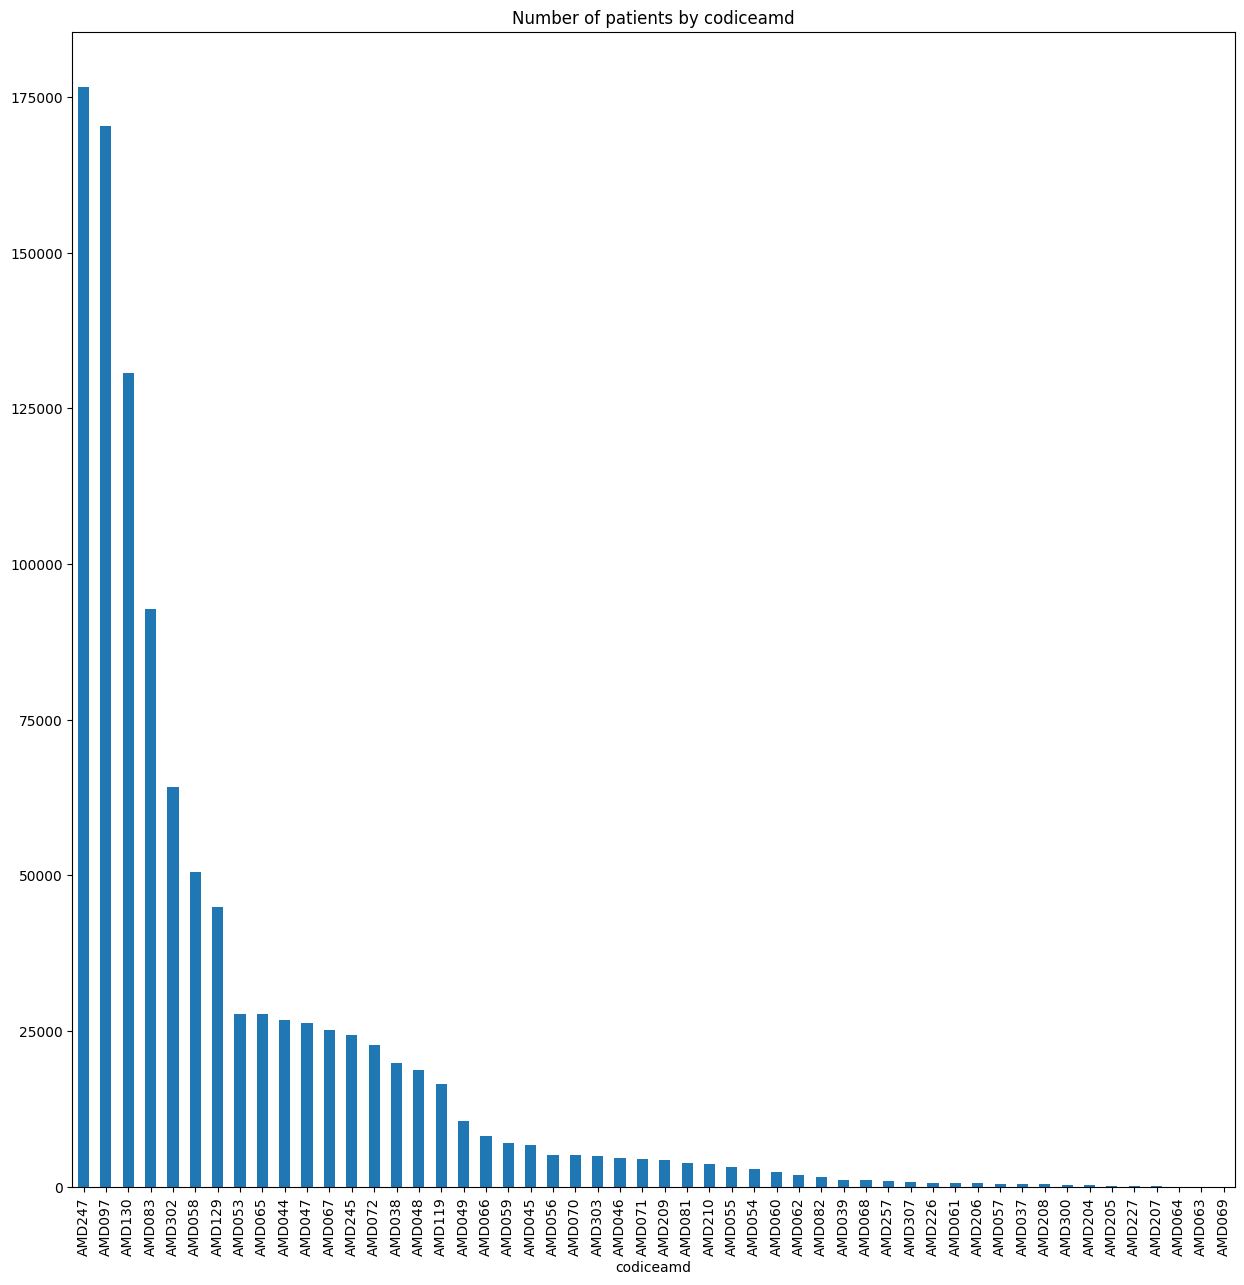

In [30]:
a = (
    df1[["idana", "idcentro", "codiceamd"]]
    .drop_duplicates()
    .groupby("codiceamd")
    .size()
    .sort_values(ascending=False)
)
# print(a)
a.plot(
    kind="bar",
    title="Number of patients by codiceamd",
    figsize=(15, 15),
)
# plt.savefig("images/patient_by_codiceamd.svg")

In [31]:
wanted_amd = [
    "AMD047",
    "AMD048",
    "AMD049",
    "AMD303",
    "AMD071",
    "AMD081",
    "AMD082",
    "AMD208",
]

codiceamd
AMD047    26295
AMD048    18800
AMD049    10615
AMD303     5016
AMD071     4401
AMD081     3835
AMD082     1556
AMD208      421
dtype: int64


<Axes: title={'center': 'Number of patients by codiceamd'}, xlabel='codiceamd'>

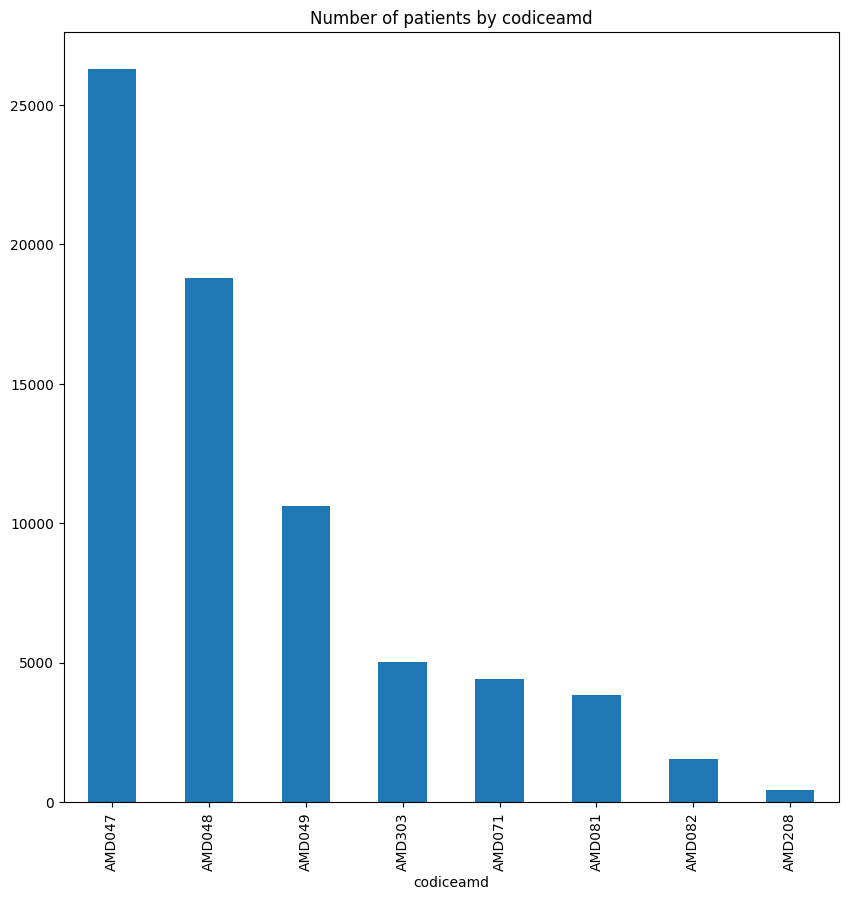

In [32]:
# select only sequent codiceamd: "AMD047","AMD048", "AMD049","AMD071","AMD081","AMD082","AMD208","AMD303"
b = a.loc[wanted_amd]
print(b)
b.plot(
    kind="bar",
    title="Number of patients by codiceamd",
    figsize=(10, 10),
)

AMD049
valore
S       36145
36.1      110
Name: count, dtype: int64


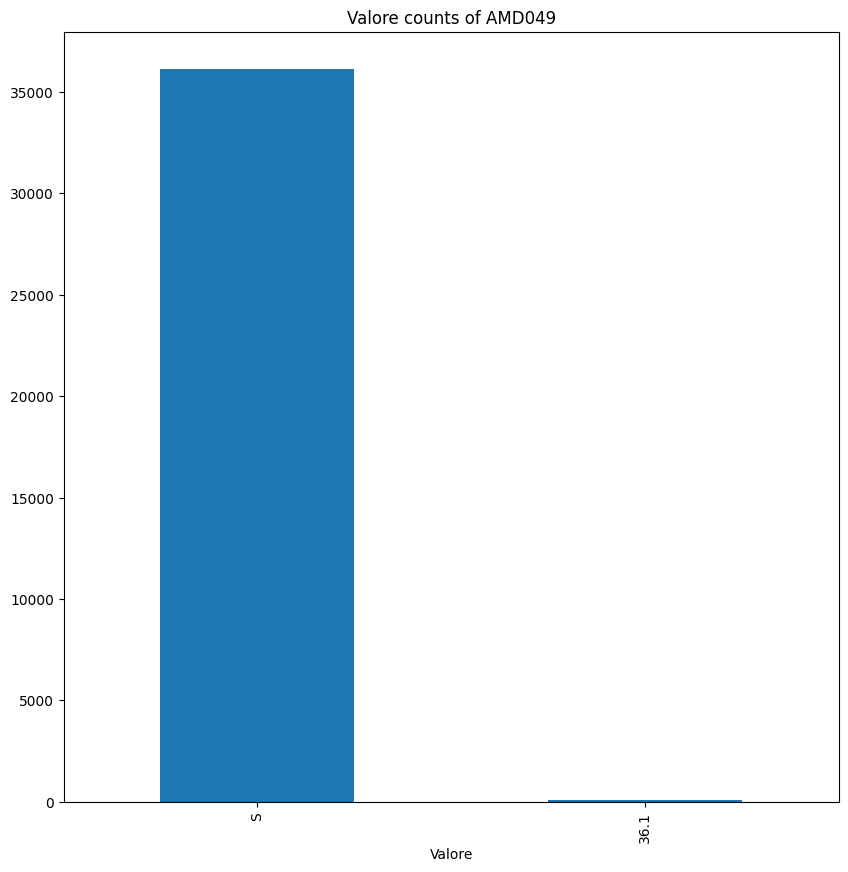

AMD047
valore
410      67939
410.0    30779
Name: count, dtype: int64


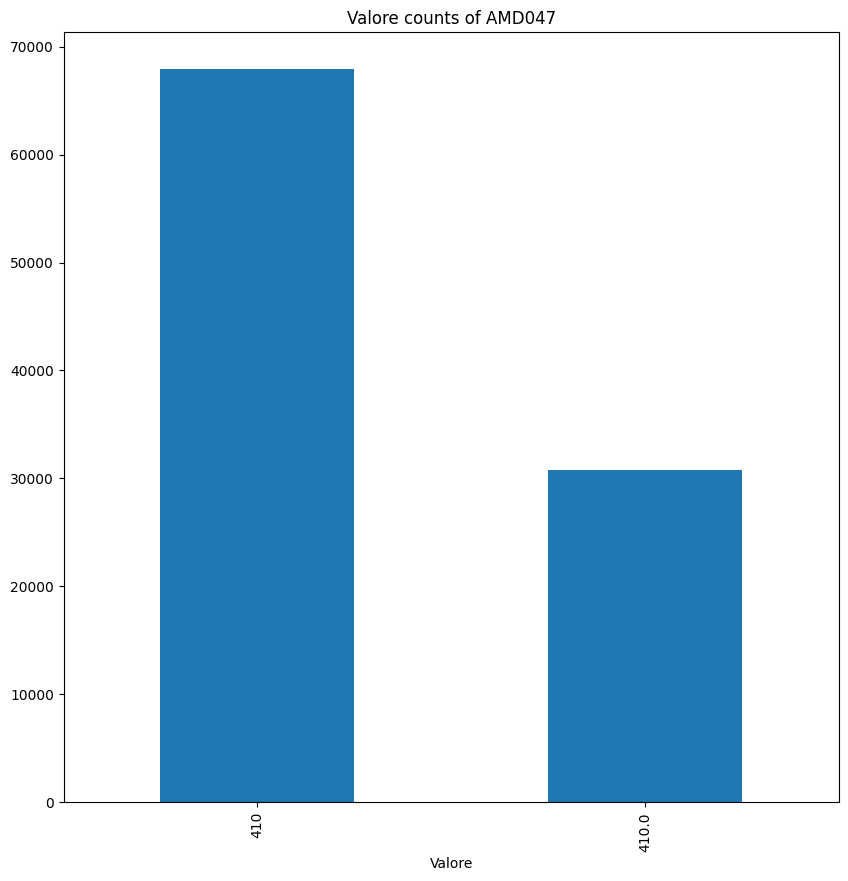

AMD303
valore
434.91    10407
433.01        8
433.11        2
434.01        2
433.21        1
433.91        1
Name: count, dtype: int64


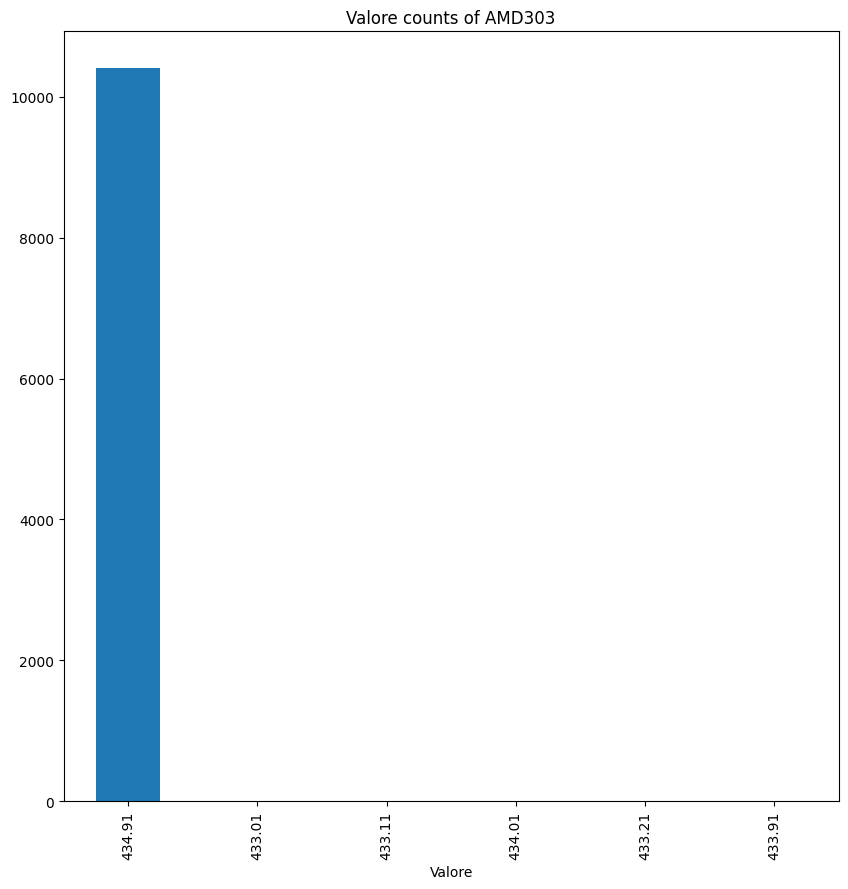

AMD048
valore
36.0    64181
Name: count, dtype: int64


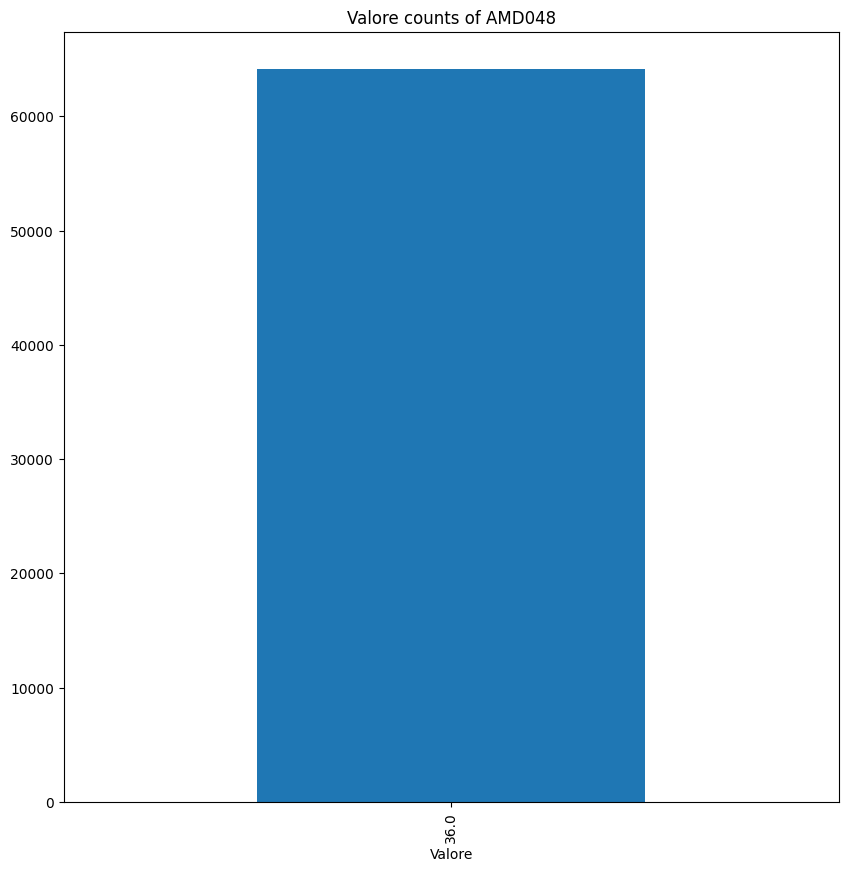

AMD081
valore
39.5     9406
39.50     816
Name: count, dtype: int64


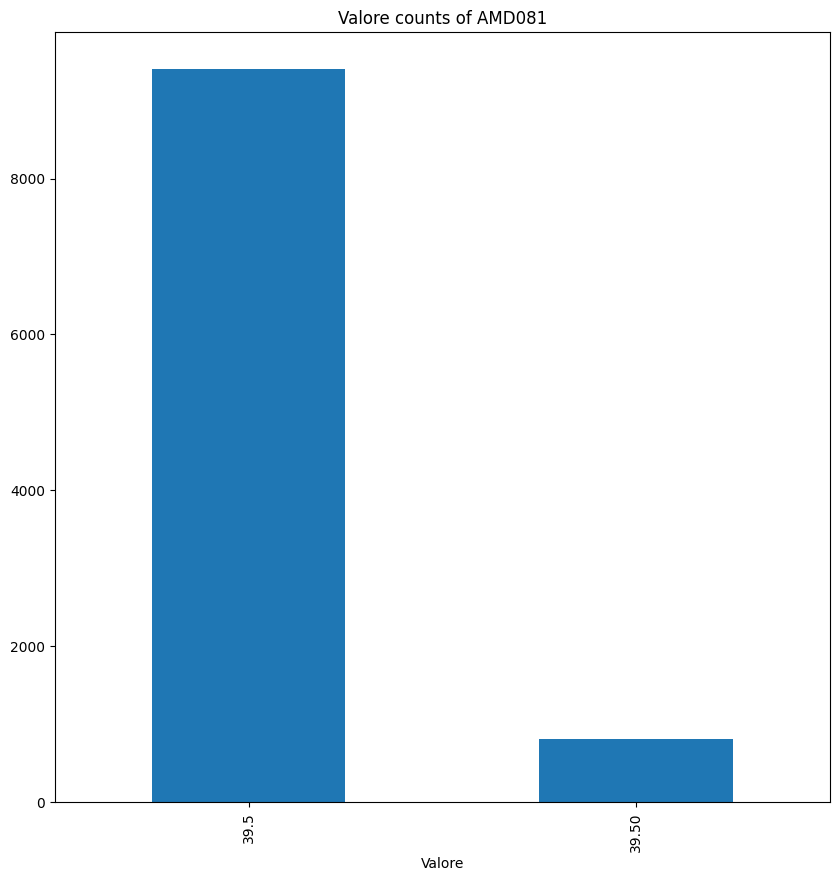

AMD082
valore
39.29    4173
Name: count, dtype: int64


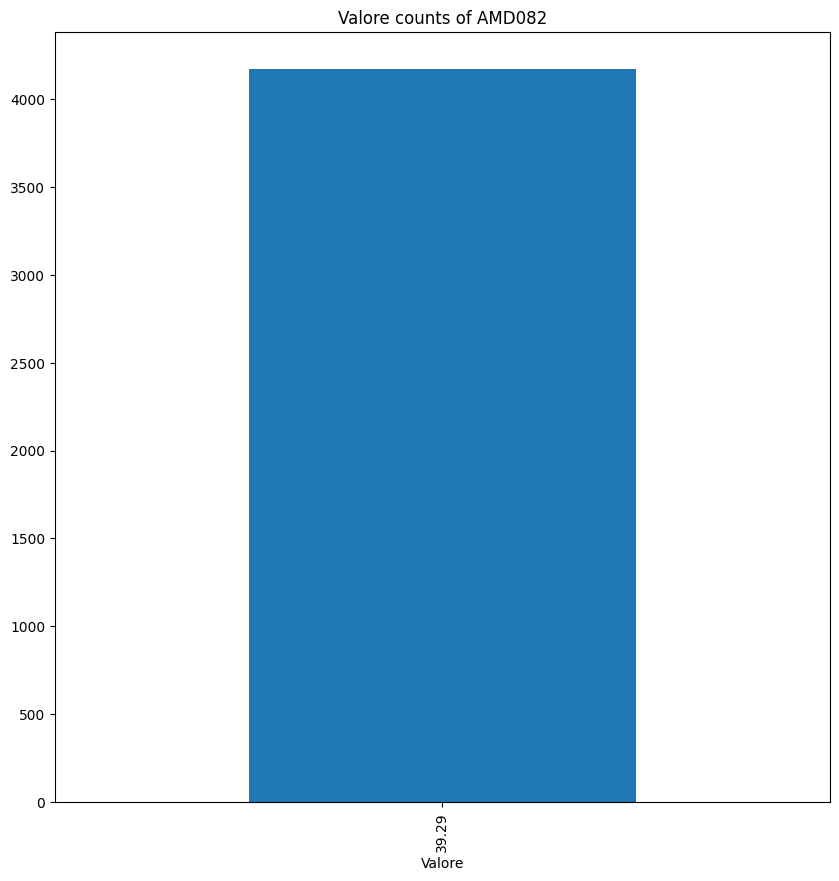

AMD071
valore
436.0    6529
436      2259
Name: count, dtype: int64


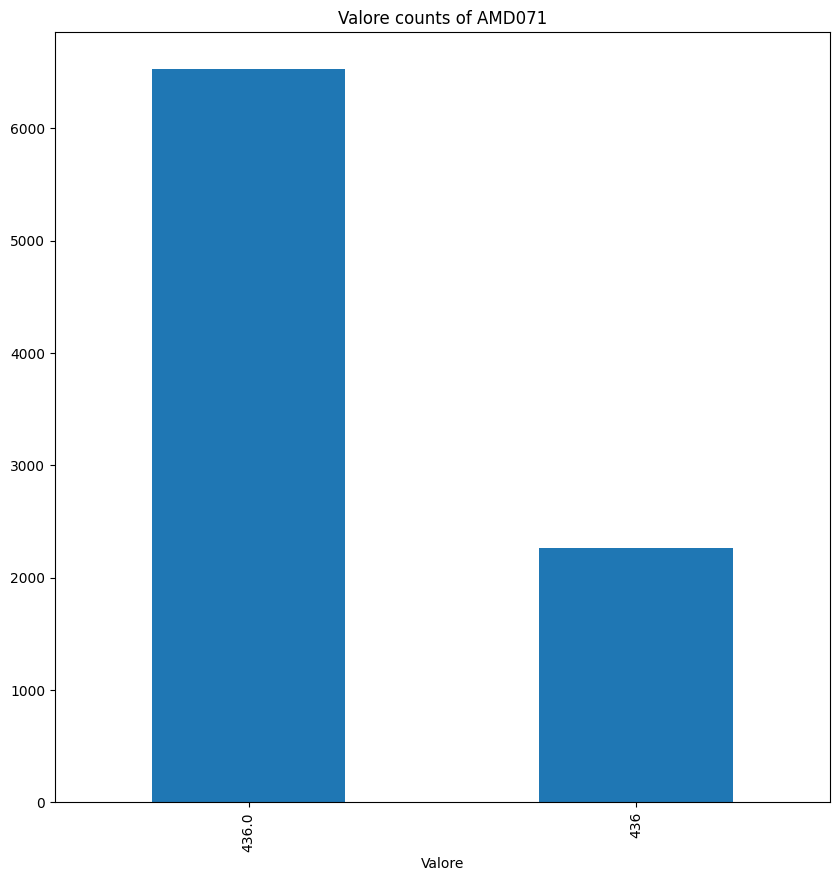

AMD208
valore
38.12    446
Name: count, dtype: int64


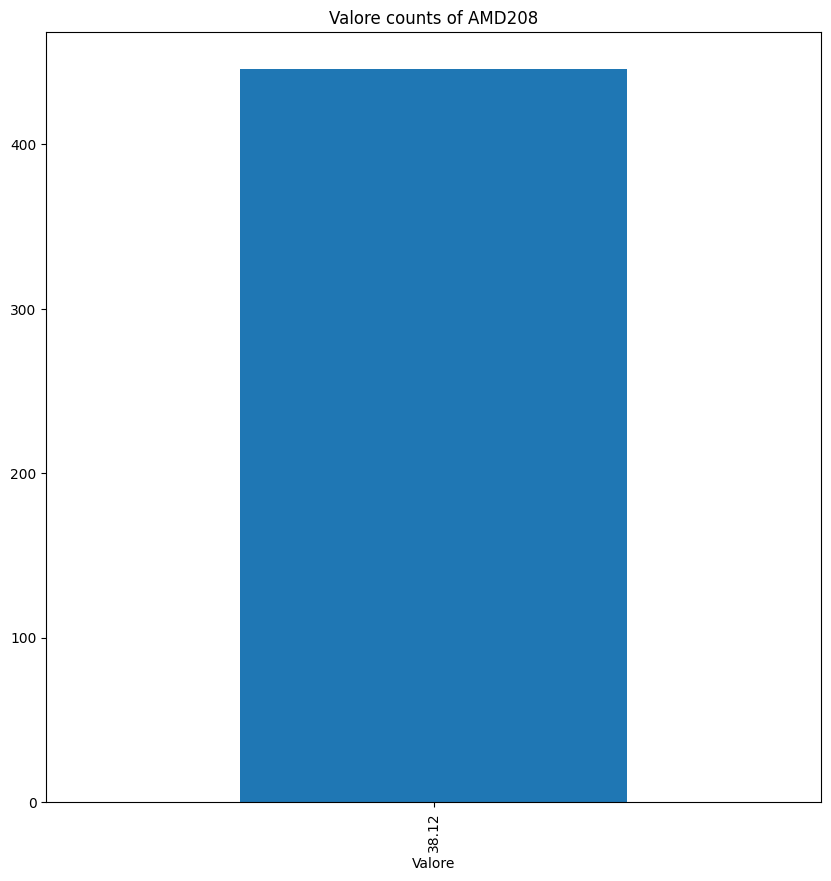

In [35]:
df2 = df1[df1["codiceamd"].isin(wanted_amd)]

for amd in df2["codiceamd"].dropna().unique():
    print(amd)
    a = df2[df2["codiceamd"] == amd]
    print(a["valore"].value_counts())
    a[f"valore"].value_counts().plot(
        kind="bar",
        title=f"Valore counts of {amd}",
        xlabel="Valore",
        figsize=(10, 10),
    )
    plt.show()

In [13]:
df2 = pd.read_csv("data/esamilaboratorioparametri.csv", header=0, index_col=0)

<Axes: title={'center': 'Number of patients by codiceamd'}, xlabel='codiceamd'>

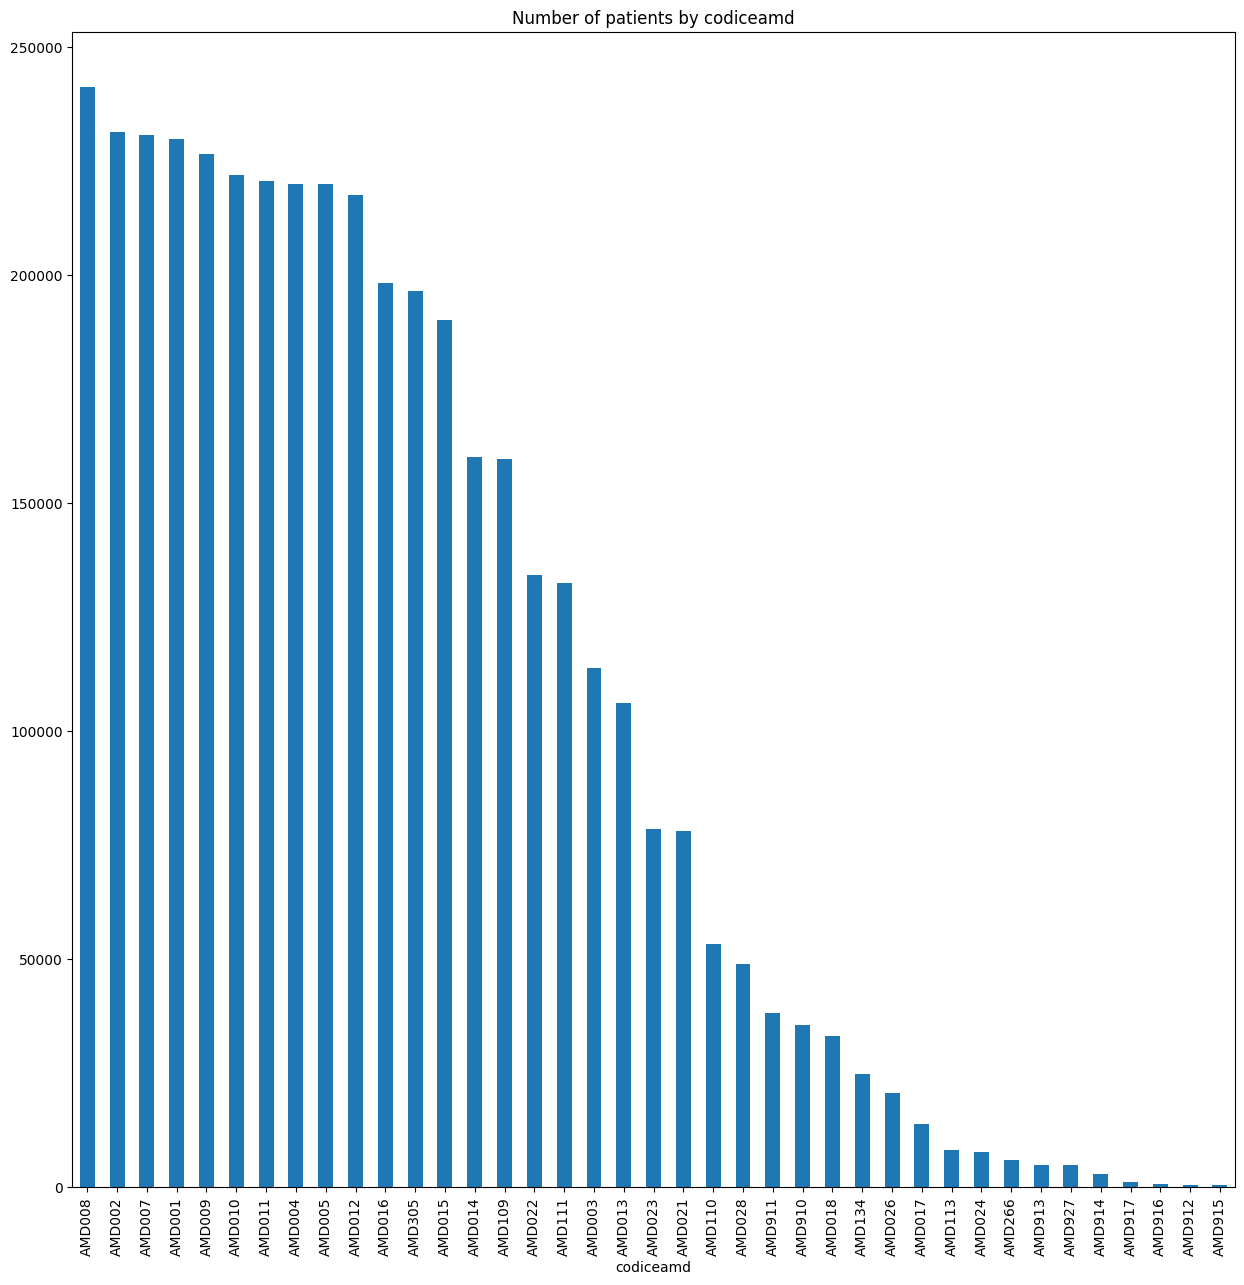

In [14]:
a = (
    df2[["idana", "idcentro", "codiceamd"]]
    .drop_duplicates()
    .groupby("codiceamd")
    .size()
    .sort_values(ascending=False)
)
# print(a)
a.plot(
    kind="bar",
    title="Number of patients by codiceamd",
    figsize=(15, 15),
)

In [15]:
# only to show that is possible to perform some research on values (it isn't optimized with groupby)
# df2["valore"] = pd.to_numeric(df2["valore"])

# for amd in df2["codiceamd"].dropna().unique():
#     print(amd)
#     a = df2[df2["codiceamd"] == amd]
#     df2[f"valore_group_{amd}"] = pd.cut(
#         a["valore"],
#         bins=[0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500],
#         labels=[
#             "0-50",
#             "51-100",
#             "101-150",
#             "151-200",
#             "201-250",
#             "251-300",
#             "301-350",
#             "351-400",
#             "401-450",
#             "451-500",
#         ],
#     )

# # print(df2)

# for amd in df2["codiceamd"].dropna().unique():
#     print(amd)
#     # print(df2[f"valore_group_{amd}"].value_counts().sort_index())
#     df2[f"valore_group_{amd}"].value_counts().sort_index().plot(
#         kind="bar",
#         title=f"Valore range of {amd}",
#         xlabel="Valore range",
#         figsize=(10, 10),
#     )
#     plt.show()

In [18]:
df3 = pd.read_csv("data/esamilaboratorioparametricalcolati.csv", header=0, index_col=0)

codiceamd
AMD304    226661
AMD927    224976
AMD013    212469
dtype: int64


<AxesSubplot:title={'center':'Number of patients by codiceamd'}, xlabel='codiceamd'>

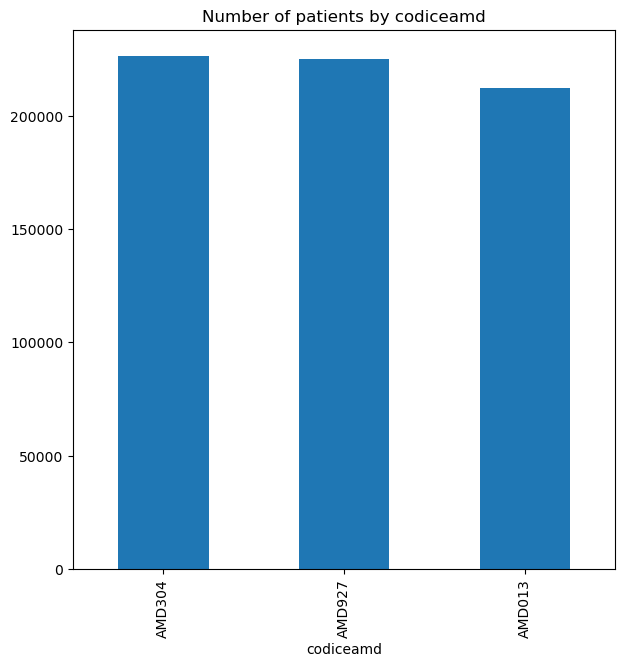

In [20]:
a = (
    df3[["idana", "idcentro", "codiceamd"]]
    .drop_duplicates()
    .groupby("codiceamd")
    .size()
    .sort_values(ascending=False)
)
print(a)
a.plot(
    kind="bar",
    title="Number of patients by codiceamd",
    figsize=(7, 7),
)

In [21]:
print(
    df3[["idana", "idcentro", "codiceamd", "codicestitch"]]
    .drop_duplicates()
    .groupby(["codicestitch", "codiceamd"])
    .size()
)

codicestitch  codiceamd
STITCH001     AMD927       224976
STITCH002     AMD013       212469
STITCH005     AMD304       226661
dtype: int64


AMD927
AMD013
AMD304
AMD927


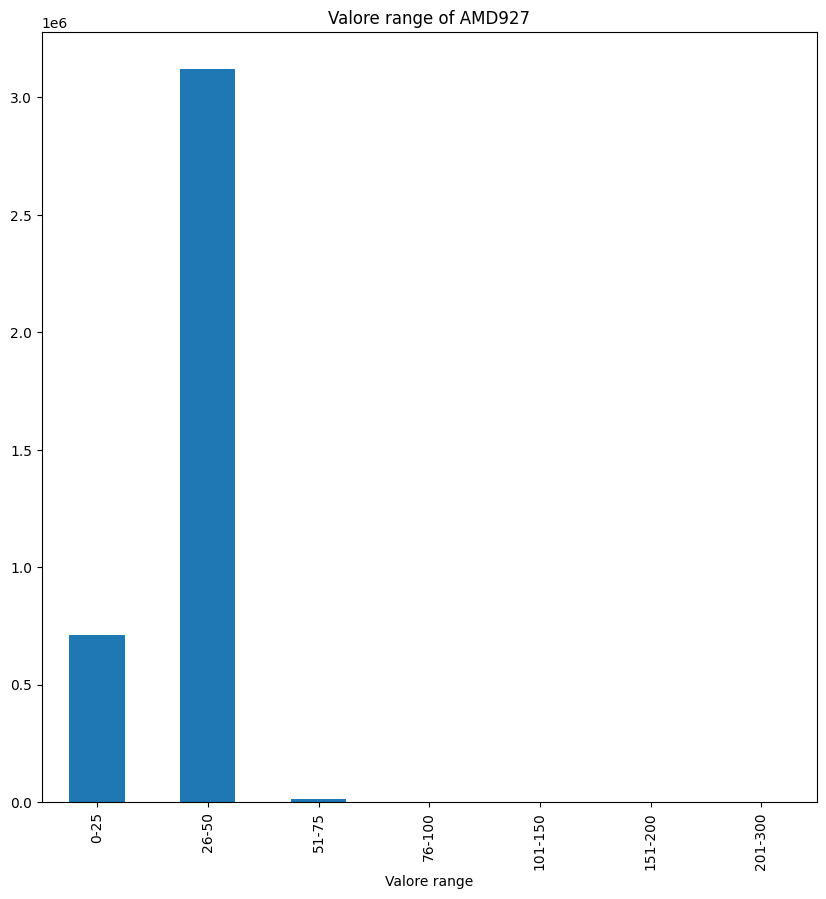

AMD013


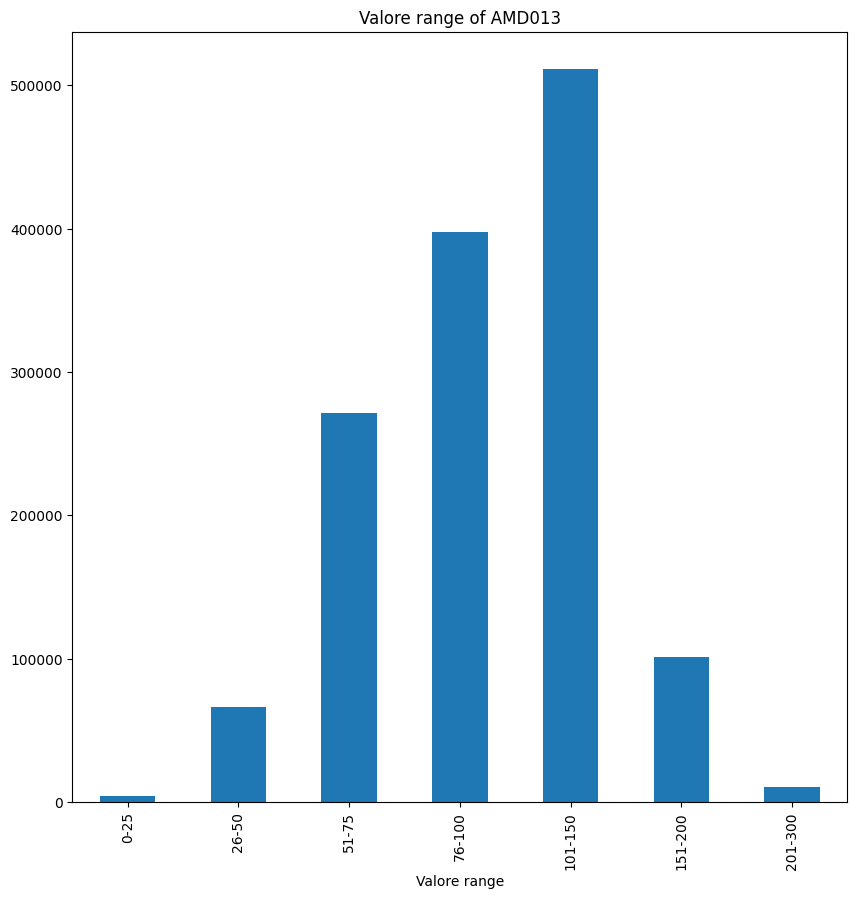

AMD304


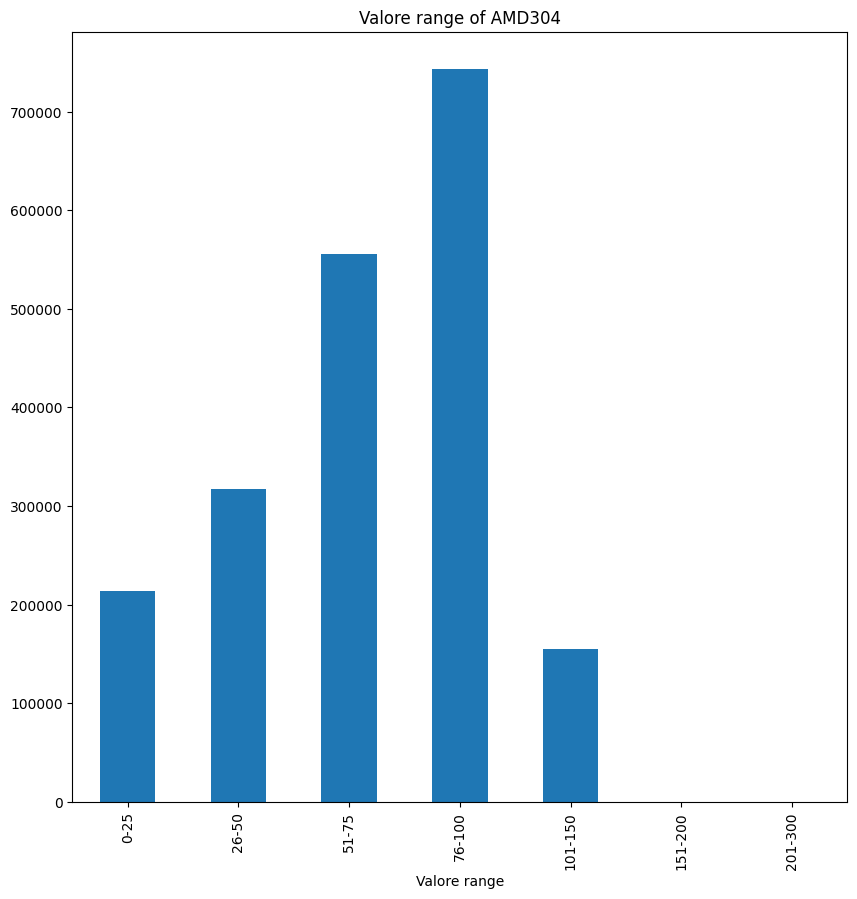

In [22]:
for amd in df3["codiceamd"].dropna().unique():
    print(amd)
    a = df3[df3["codiceamd"] == amd]
    df3[f"valore_group_{amd}"] = pd.cut(
        a["valore"],
        bins=[0, 25, 50, 75, 100, 150, 200, 300],
        labels=[
            "0-25",
            "26-50",
            "51-75",
            "76-100",
            "101-150",
            "151-200",
            "201-300",
        ],
    )

# print(df2)

for amd in df3["codiceamd"].dropna().unique():
    print(amd)
    # print(df2[f"valore_group_{amd}"].value_counts().sort_index())
    df3[f"valore_group_{amd}"].value_counts().sort_index().plot(
        kind="bar",
        title=f"Valore range of {amd}",
        xlabel="Valore range",
        figsize=(10, 10),
    )
    plt.show()

<Axes: title={'center': 'Number of patients by codicestitch'}, xlabel='codicestitch'>

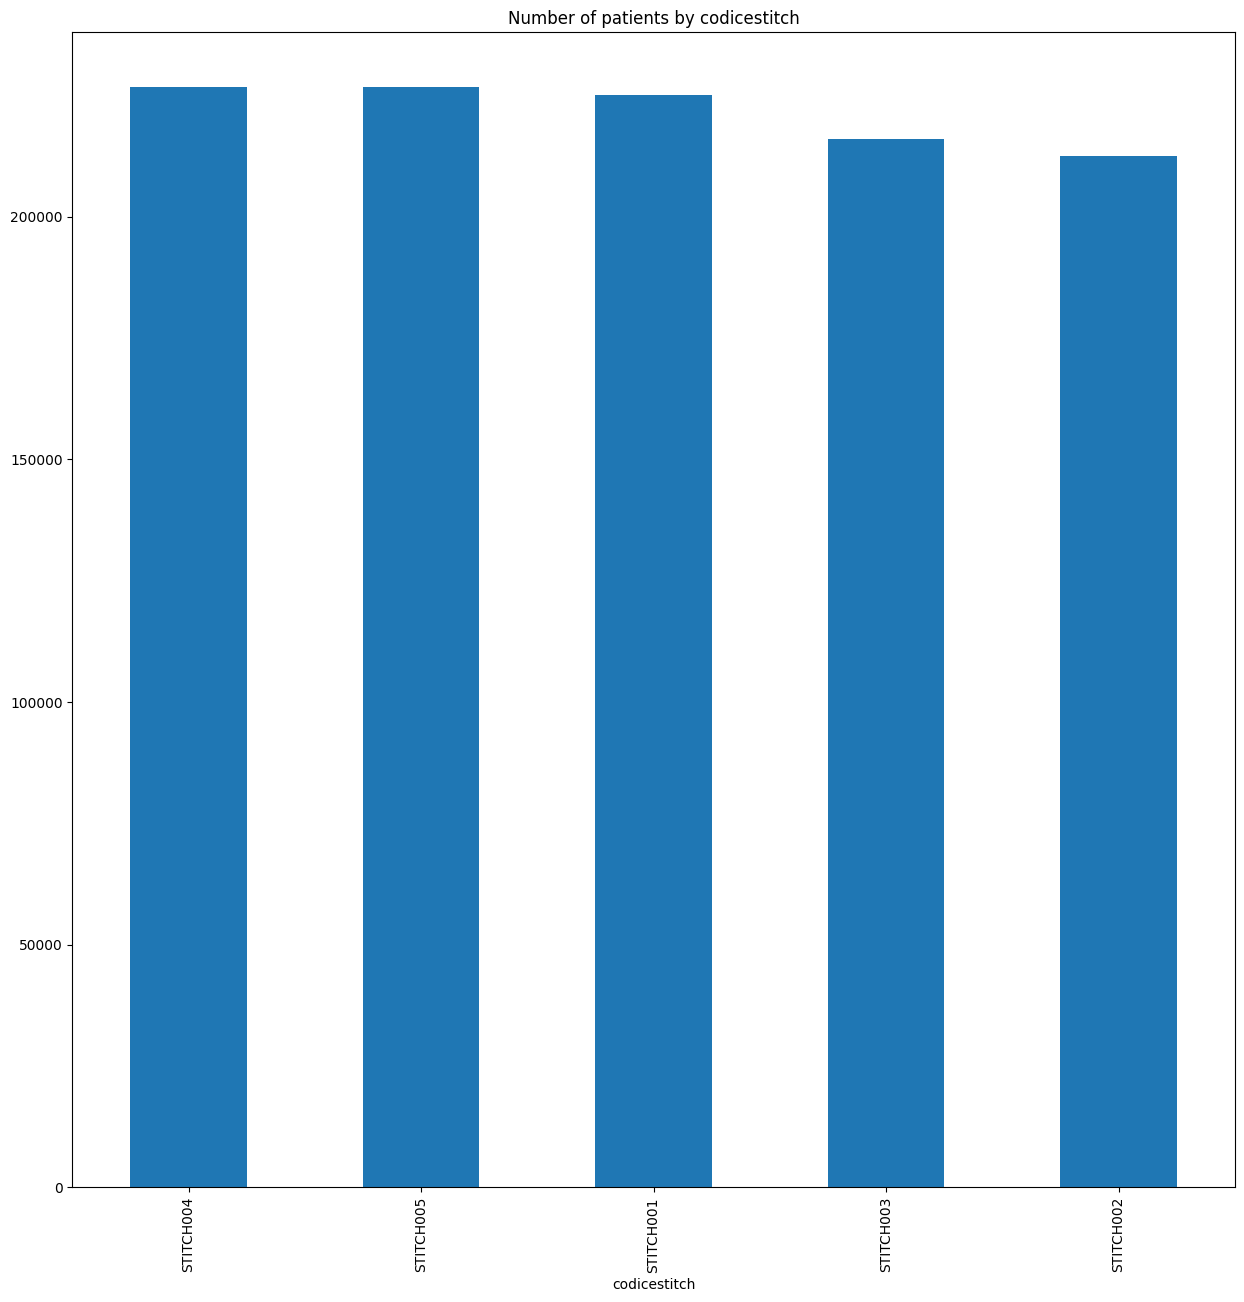

In [19]:
a = (
    df3[["idana", "idcentro", "codicestitch"]]
    .drop_duplicates()
    .groupby("codicestitch")
    .size()
    .sort_values(ascending=False)
)
# print(a)
a.plot(
    kind="bar",
    title="Number of patients by codicestitch",
    figsize=(10, 10),
)

STITCH001
STITCH002
STITCH003
STITCH004
STITCH005
STITCH001


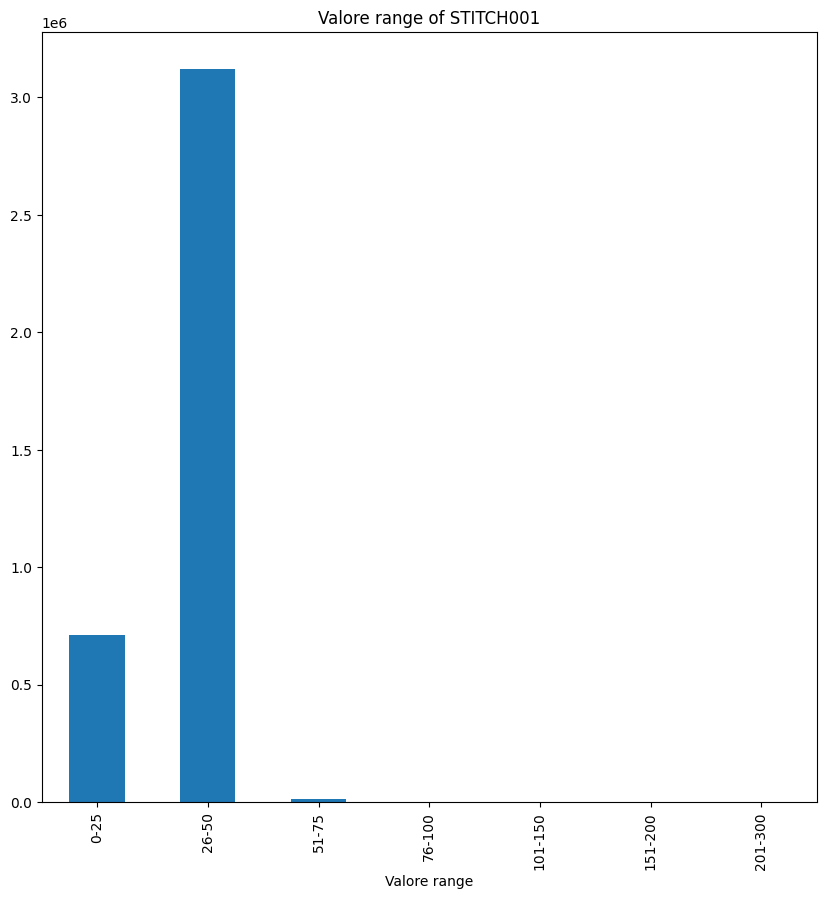

STITCH002


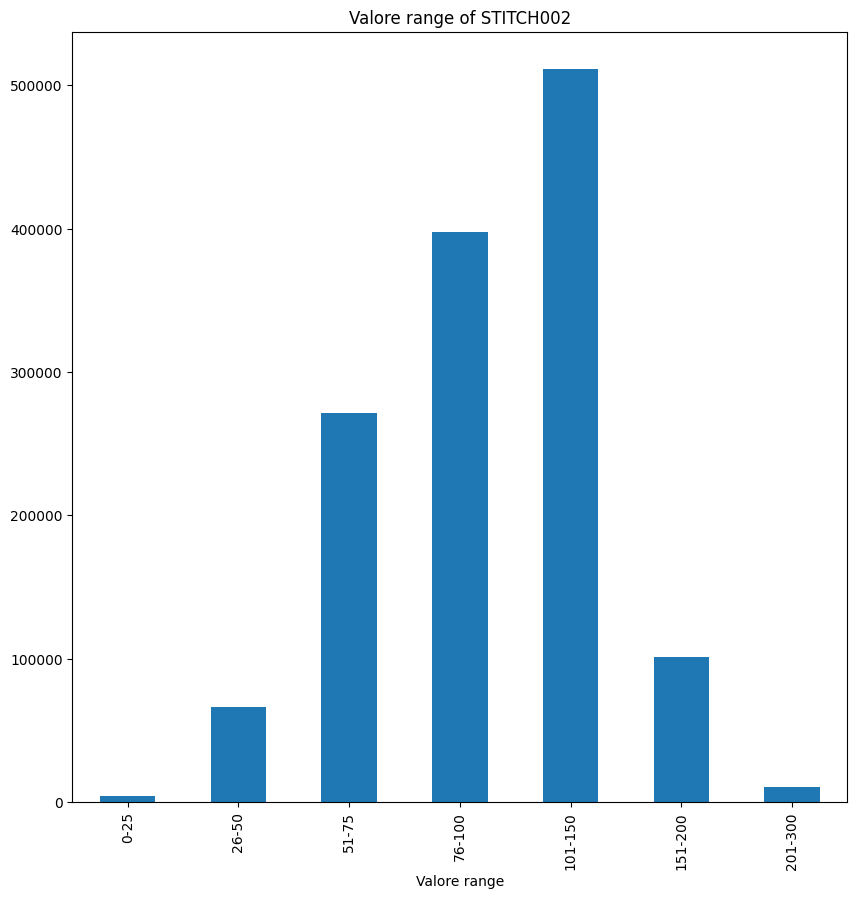

STITCH003


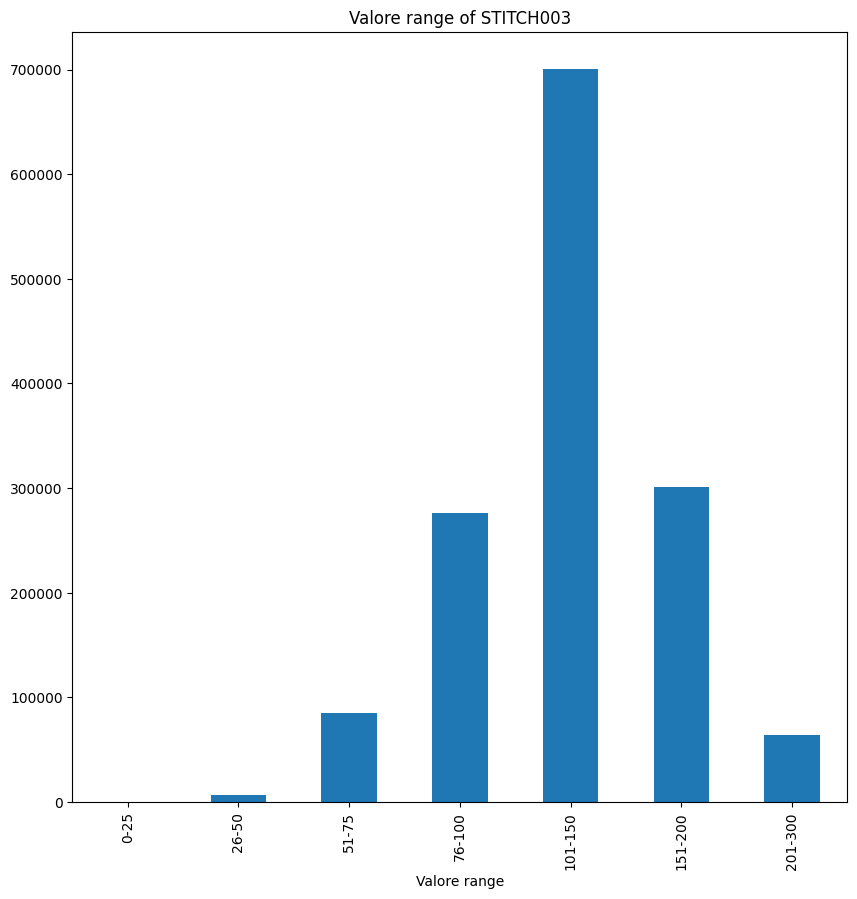

STITCH004


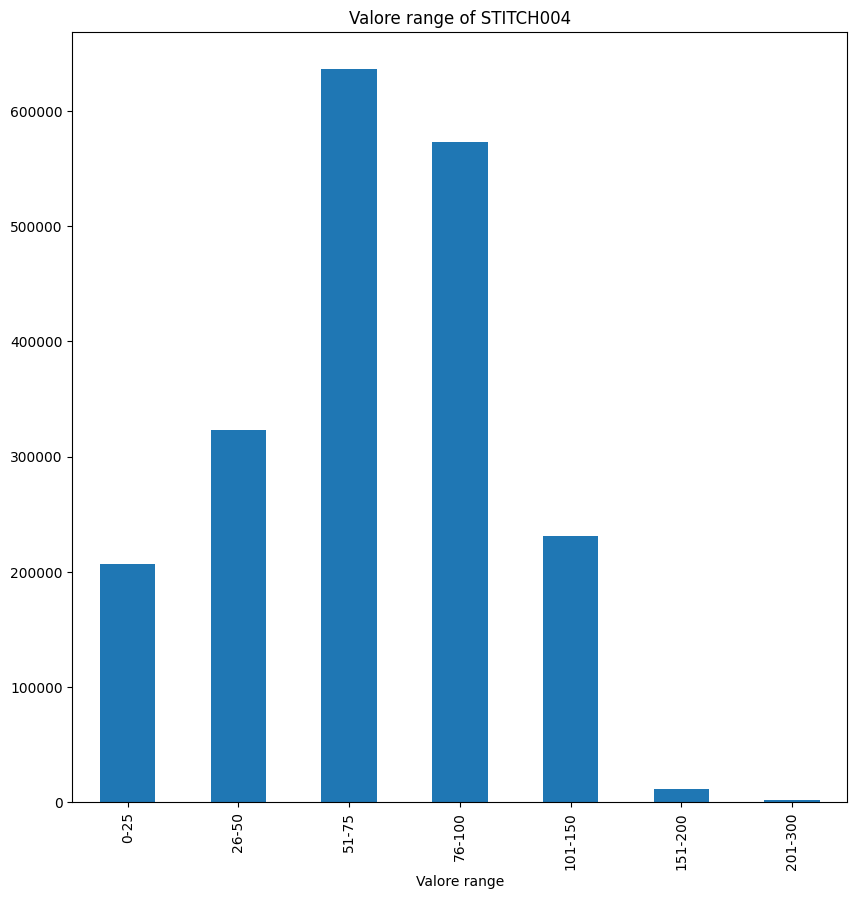

STITCH005


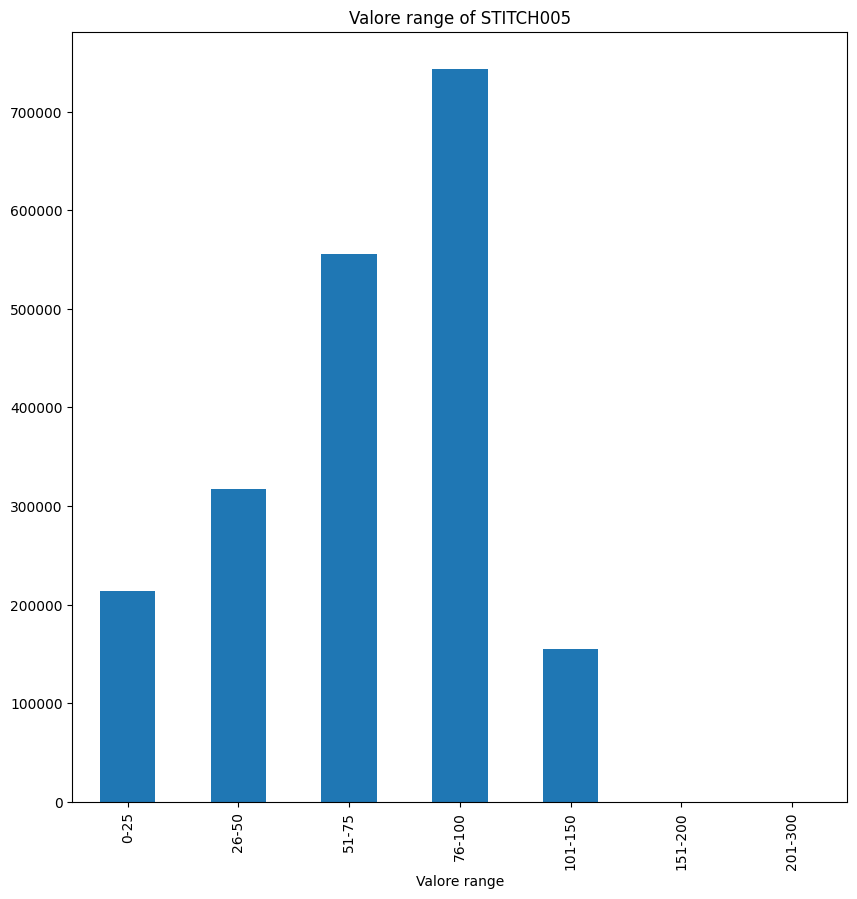

In [23]:
for amd in df3["codicestitch"].dropna().unique():
    print(amd)
    a = df3[df3["codicestitch"] == amd]
    df3[f"valore_group_{amd}"] = pd.cut(
        a["valore"],
        bins=[0, 25, 50, 75, 100, 150, 200, 300],
        labels=[
            "0-25",
            "26-50",
            "51-75",
            "76-100",
            "101-150",
            "151-200",
            "201-300",
        ],
    )

# print(df2)

for amd in df3["codicestitch"].dropna().unique():
    print(amd)
    # print(df2[f"valore_group_{amd}"].value_counts().sort_index())
    df3[f"valore_group_{amd}"].value_counts().sort_index().plot(
        kind="bar",
        title=f"Valore range of {amd}",
        xlabel="Valore range",
        figsize=(10, 10),
    )
    plt.show()

In [14]:
df4 = pd.read_csv("data/esamistrumentali.csv", header=0, index_col=0)

<AxesSubplot:title={'center':'Number of patients by codiceamd'}, xlabel='codiceamd'>

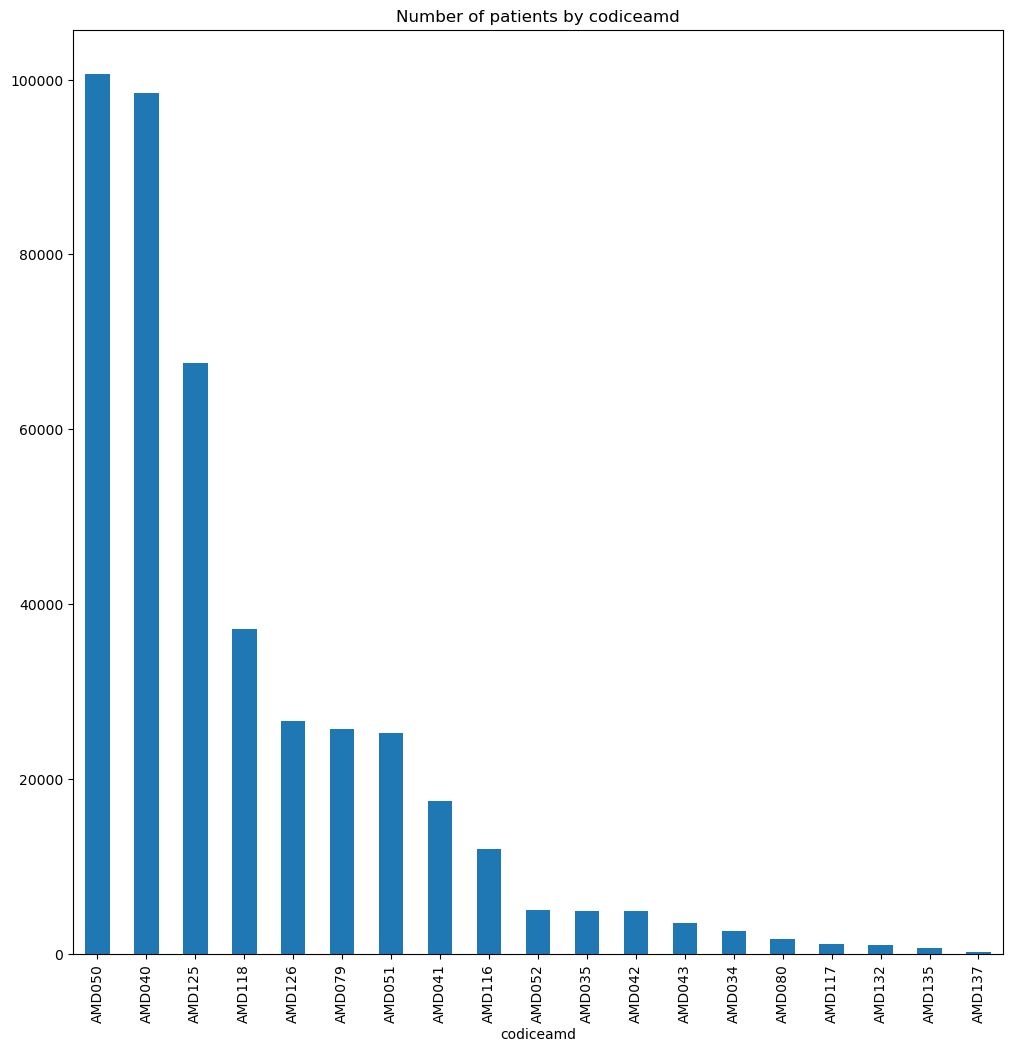

In [15]:
a = (
    df4[["idana", "idcentro", "codiceamd"]]
    .drop_duplicates()
    .groupby("codiceamd")
    .size()
    .sort_values(ascending=False)
)
# print(a)
a.plot(
    kind="bar",
    title="Number of patients by codiceamd",
    figsize=(12, 12),
)

AMD051
N    43272
P     8445
Name: valore, dtype: int64


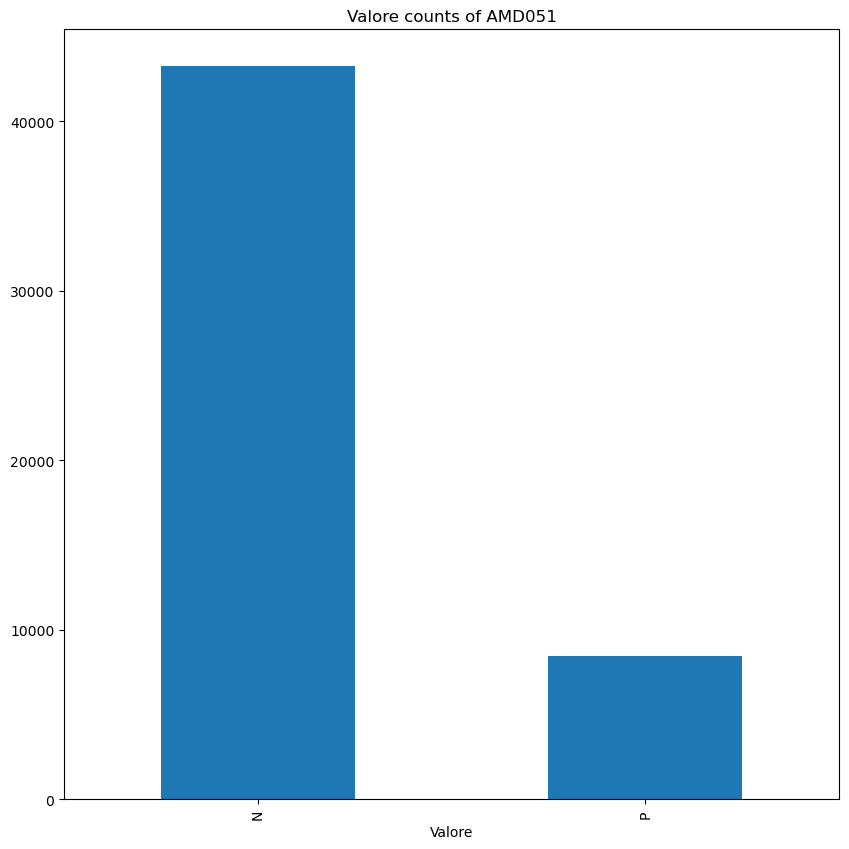

AMD041
P    13782
N     9419
Name: valore, dtype: int64


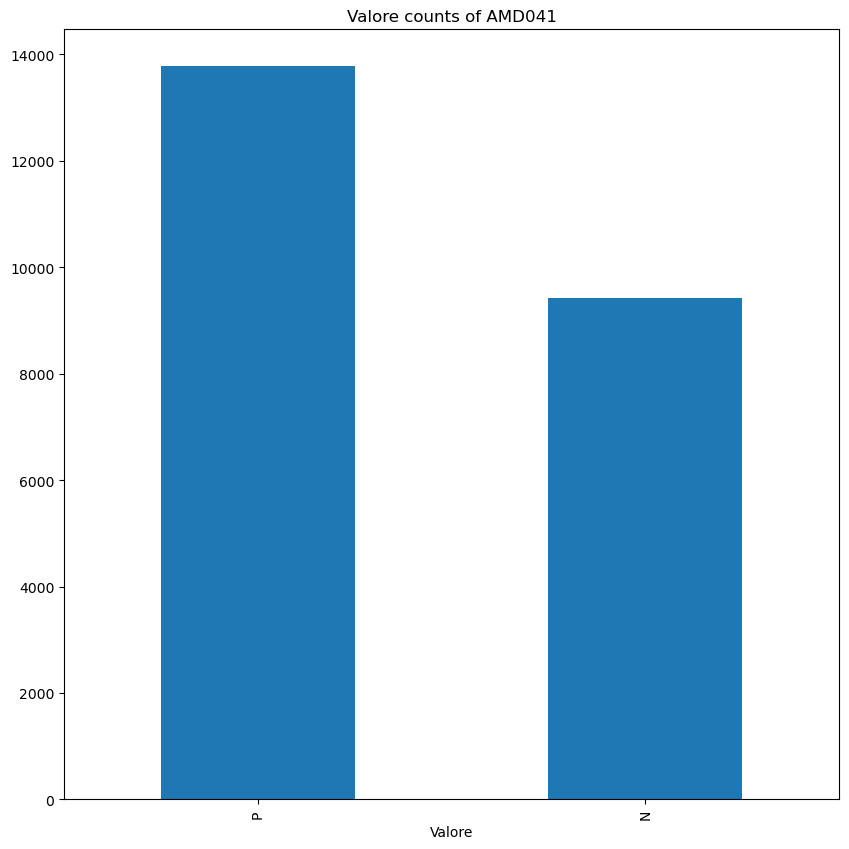

AMD040
N    170939
P     77922
Name: valore, dtype: int64


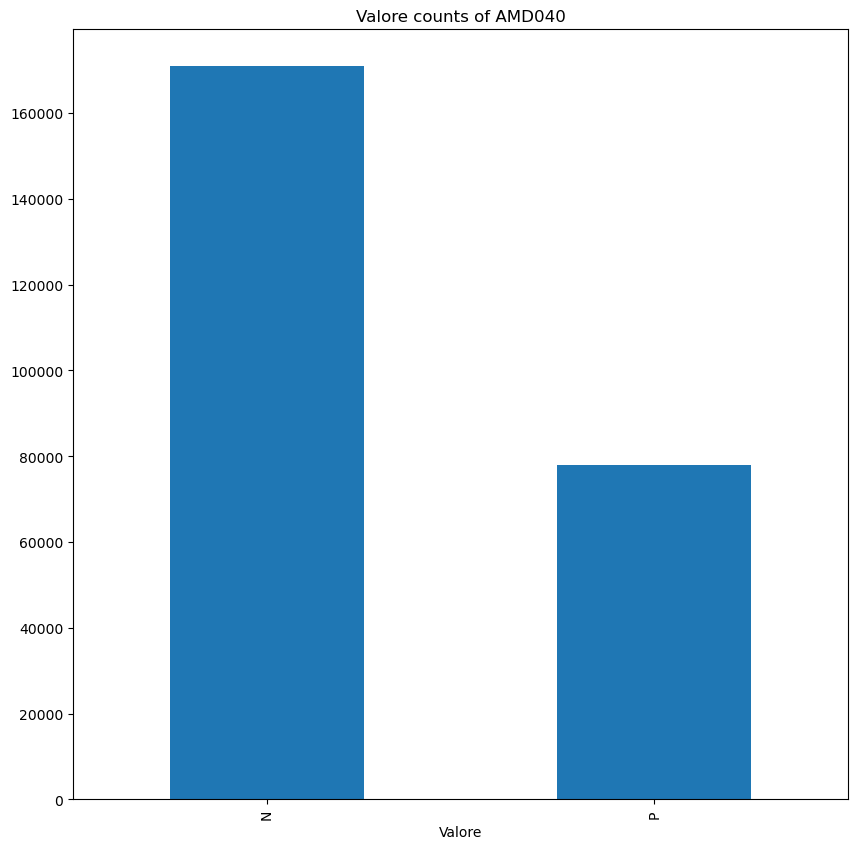

AMD116
P    9355
N    6821
Name: valore, dtype: int64


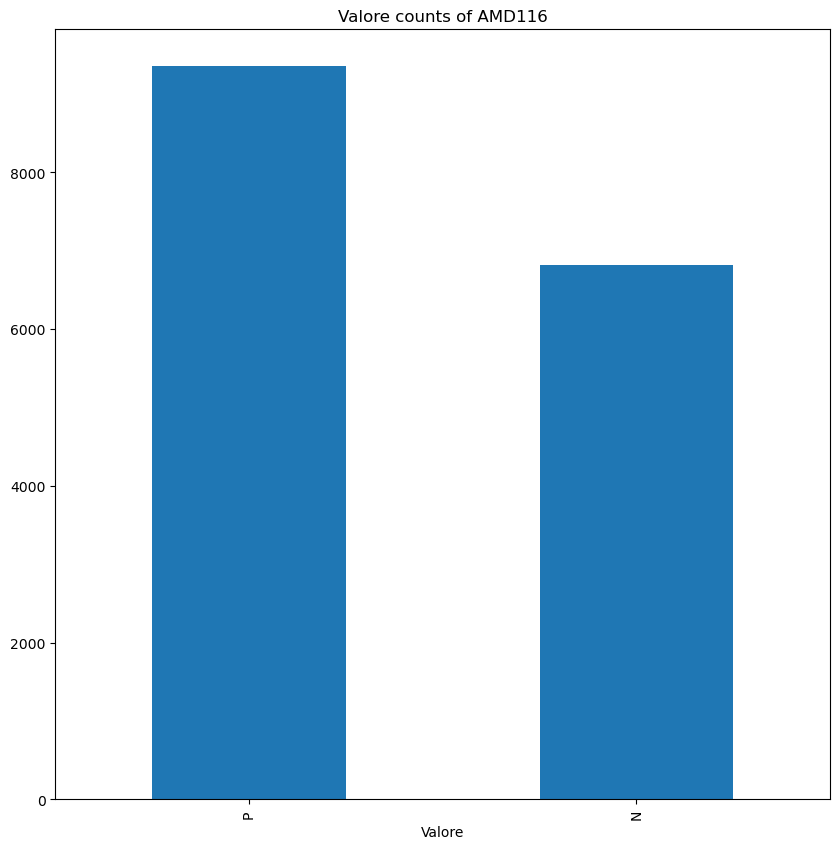

AMD118
S    67454
N    32744
Name: valore, dtype: int64


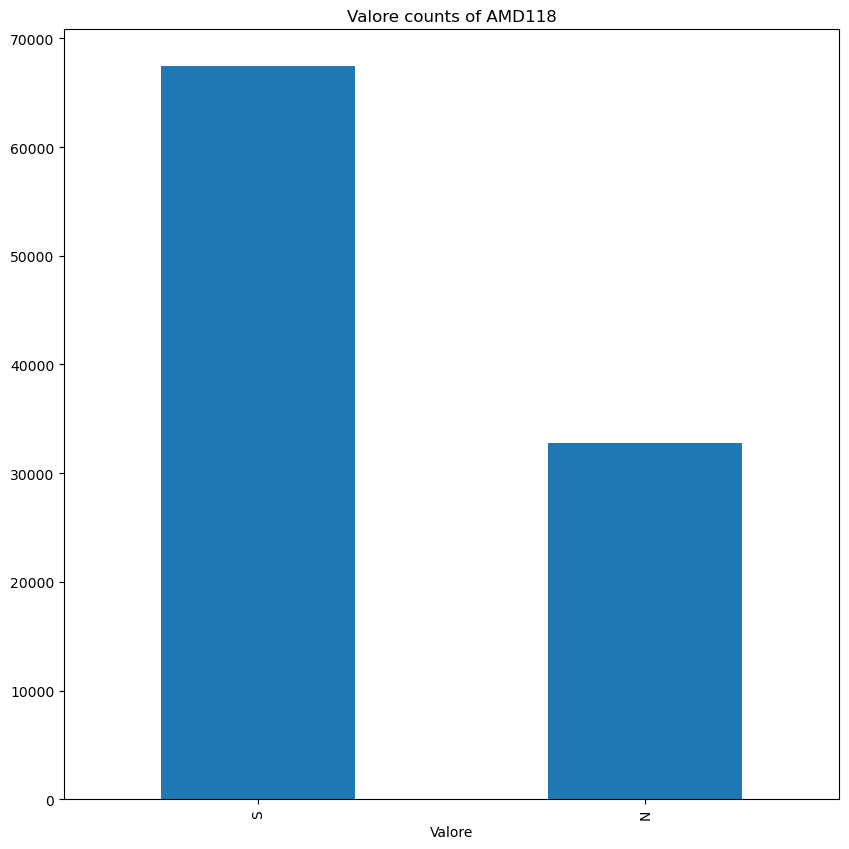

AMD052
P    6457
N     821
Name: valore, dtype: int64


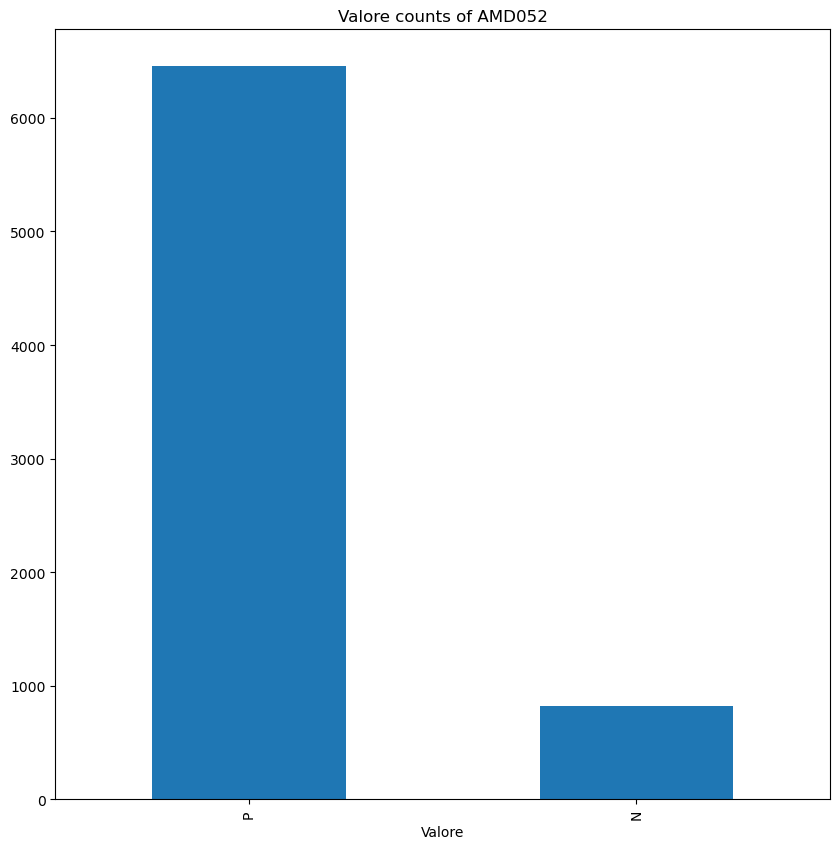

AMD043
P    3506
N     591
Name: valore, dtype: int64


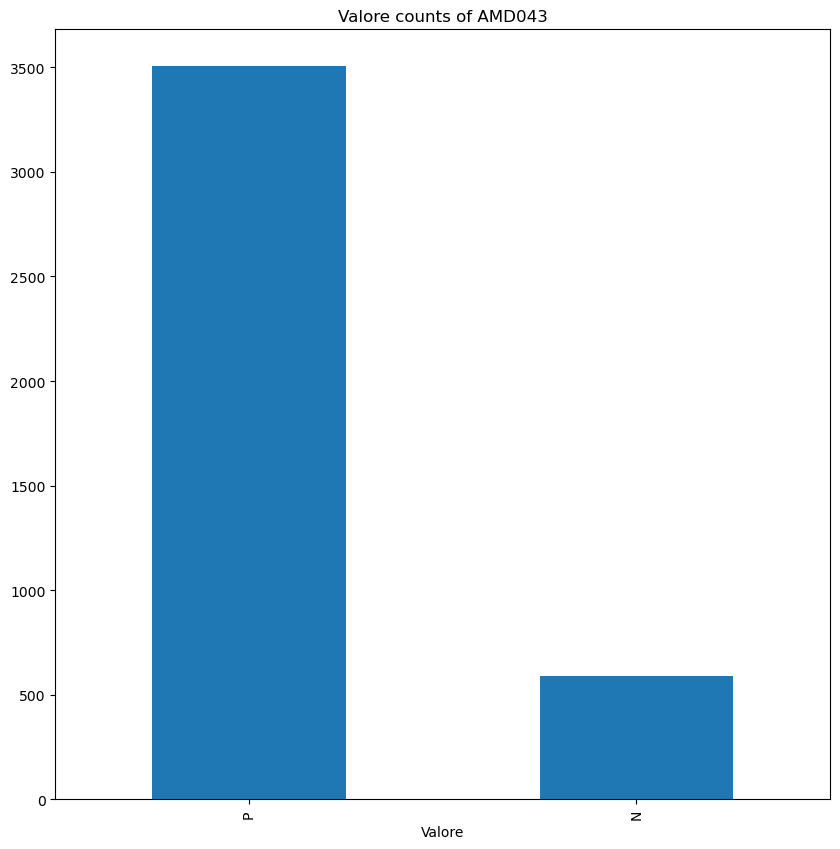

AMD125
N    96427
P    23932
Name: valore, dtype: int64


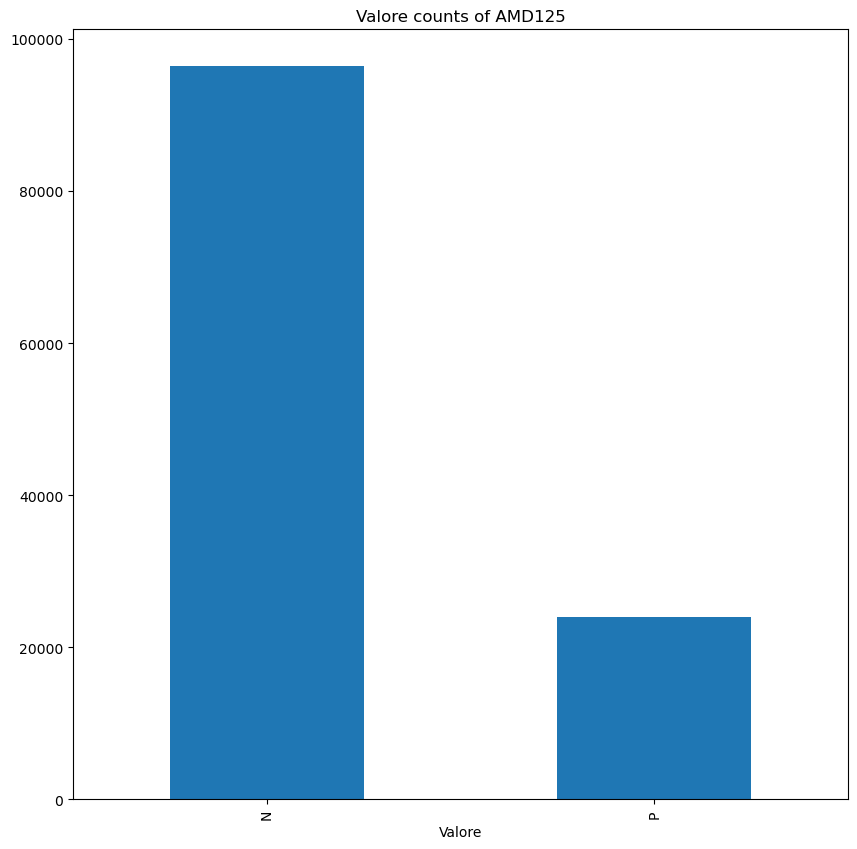

AMD035
P    3765
N    2086
Name: valore, dtype: int64


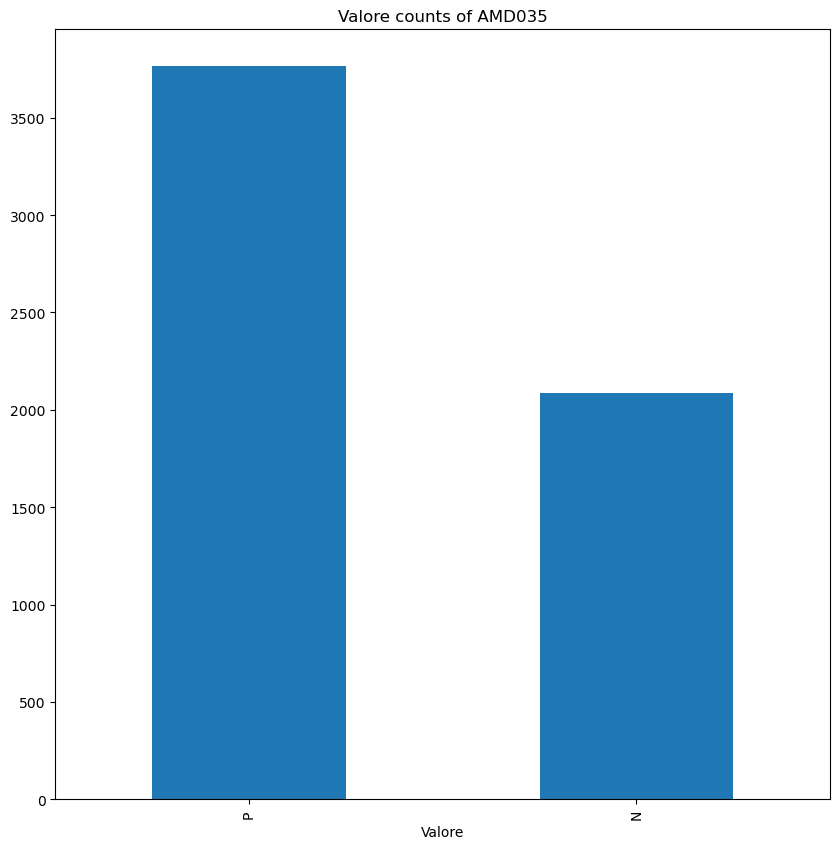

AMD080
P    1619
N     288
Name: valore, dtype: int64


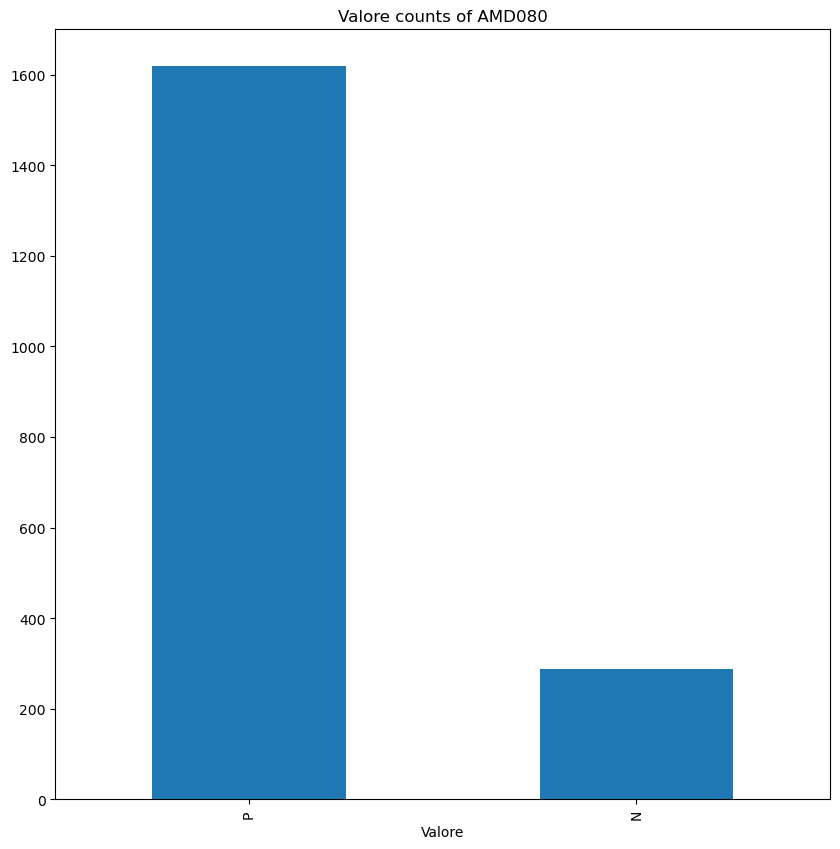

AMD135
P    536
N    267
Name: valore, dtype: int64


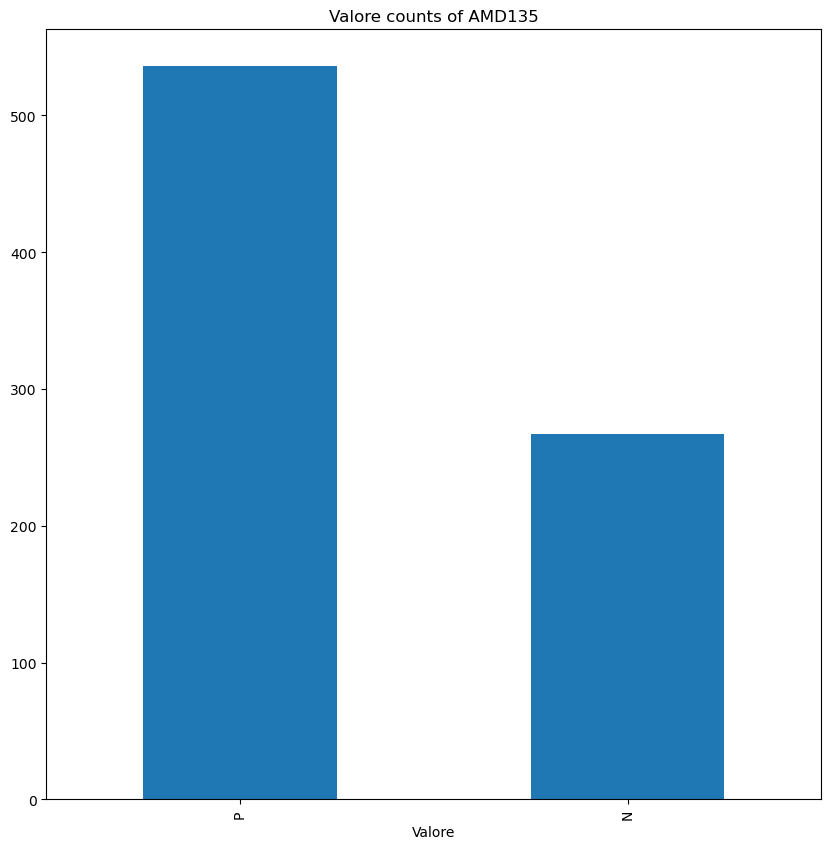

AMD034
N    2416
P     768
Name: valore, dtype: int64


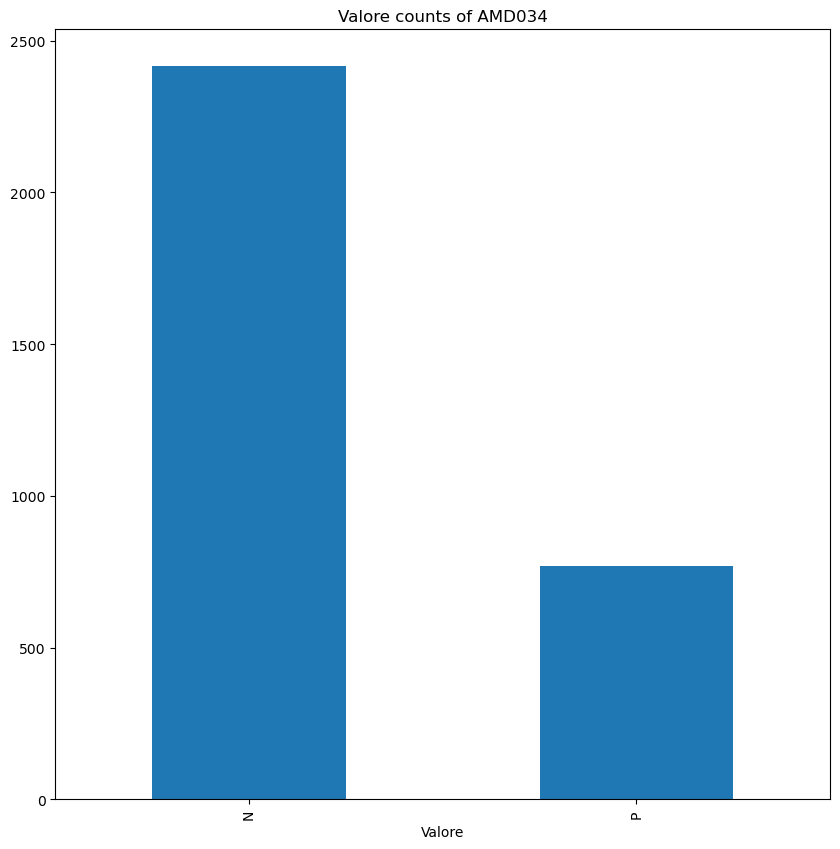

AMD117
P    655
N    547
Name: valore, dtype: int64


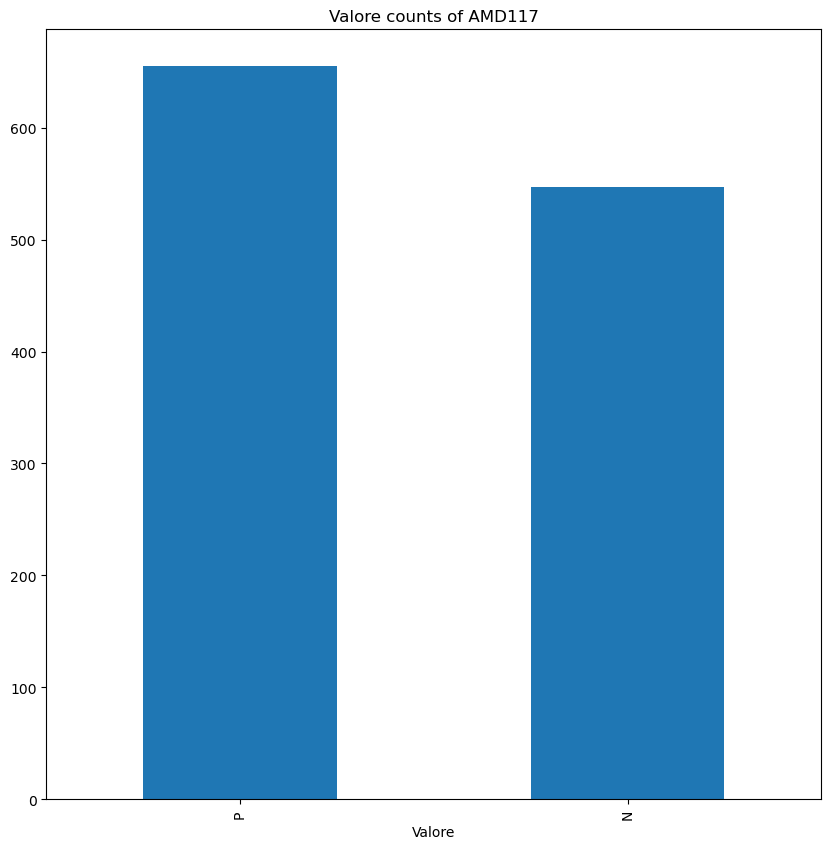

AMD050
N    190044
P     52188
Name: valore, dtype: int64


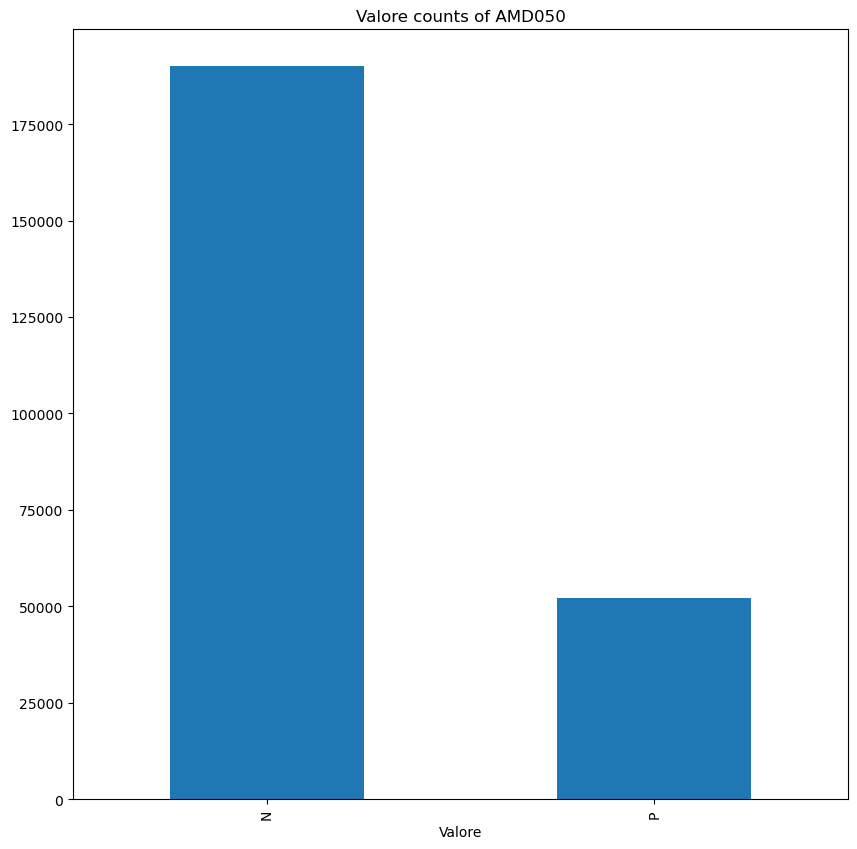

AMD132
P    537
N    517
Name: valore, dtype: int64


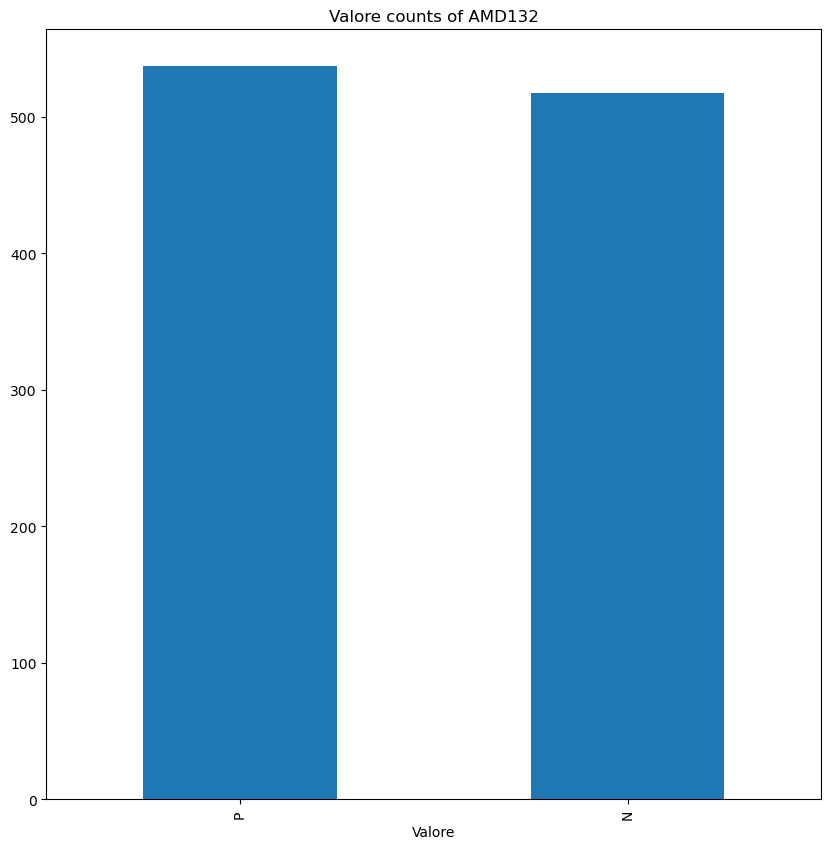

AMD126
N    36122
P    17116
Name: valore, dtype: int64


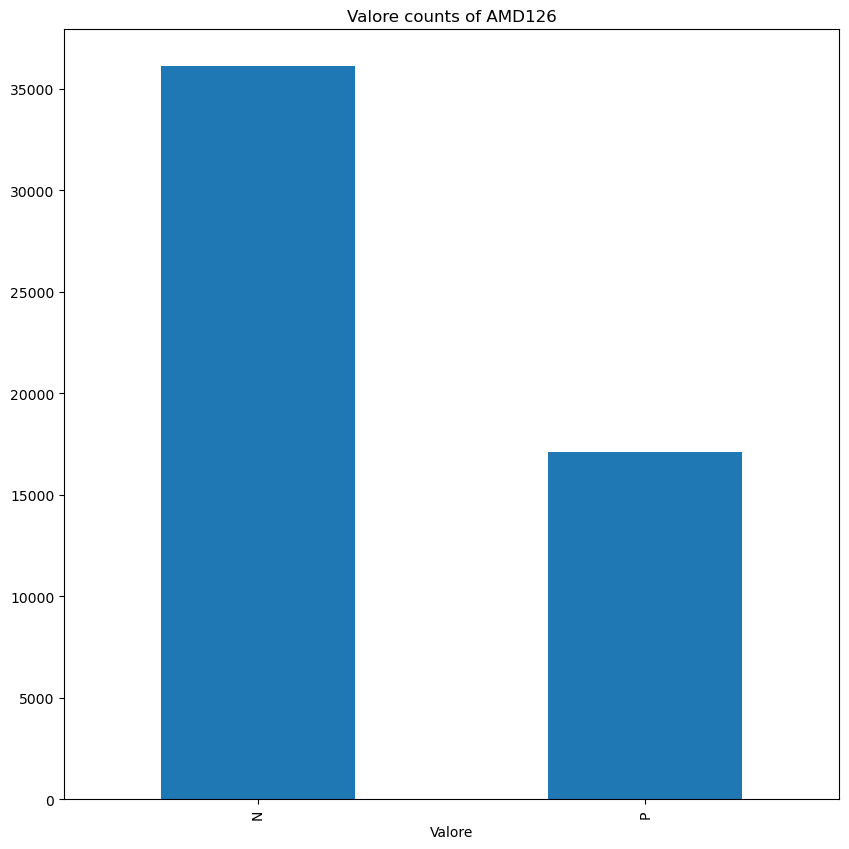

AMD079
N    25840
P    18216
Name: valore, dtype: int64


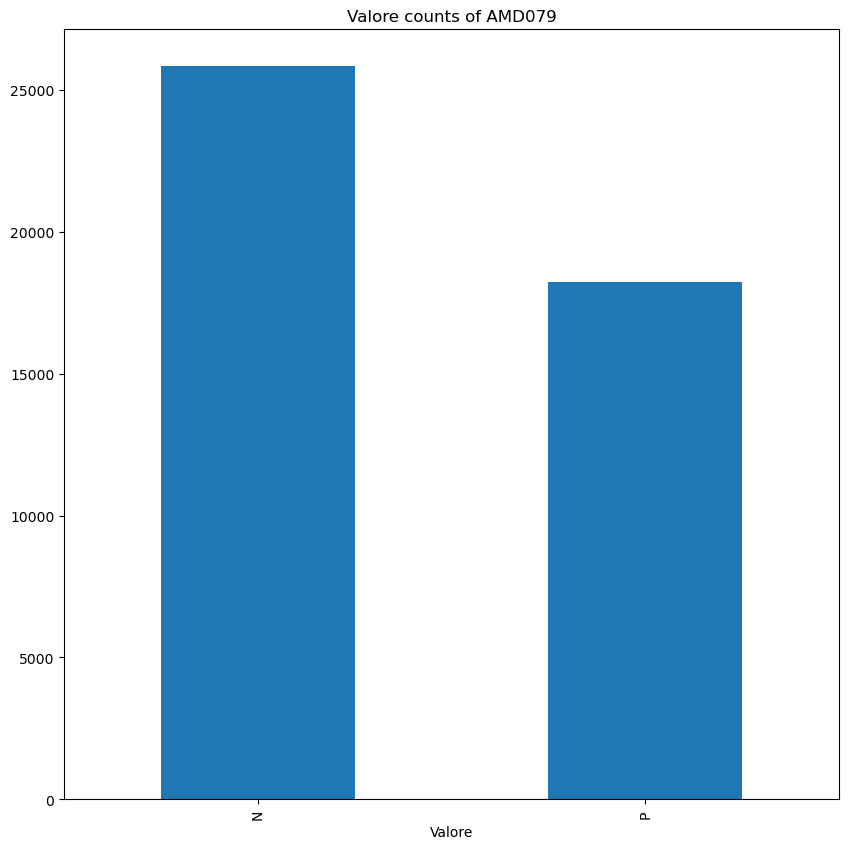

AMD042
N    4962
P    1091
Name: valore, dtype: int64


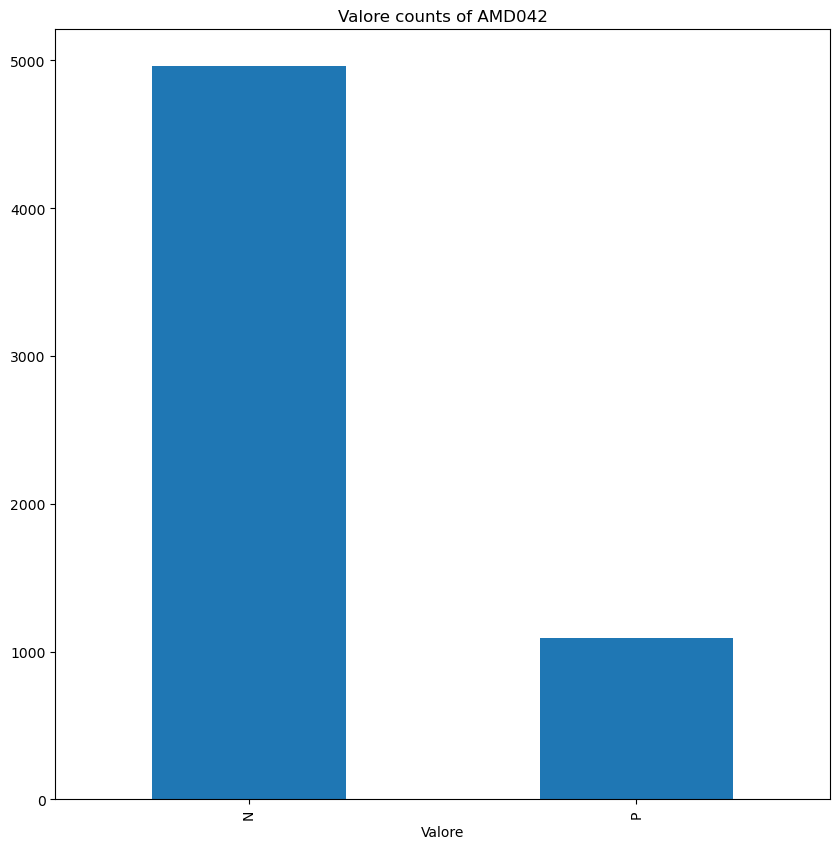

AMD137
P    154
N     33
Name: valore, dtype: int64


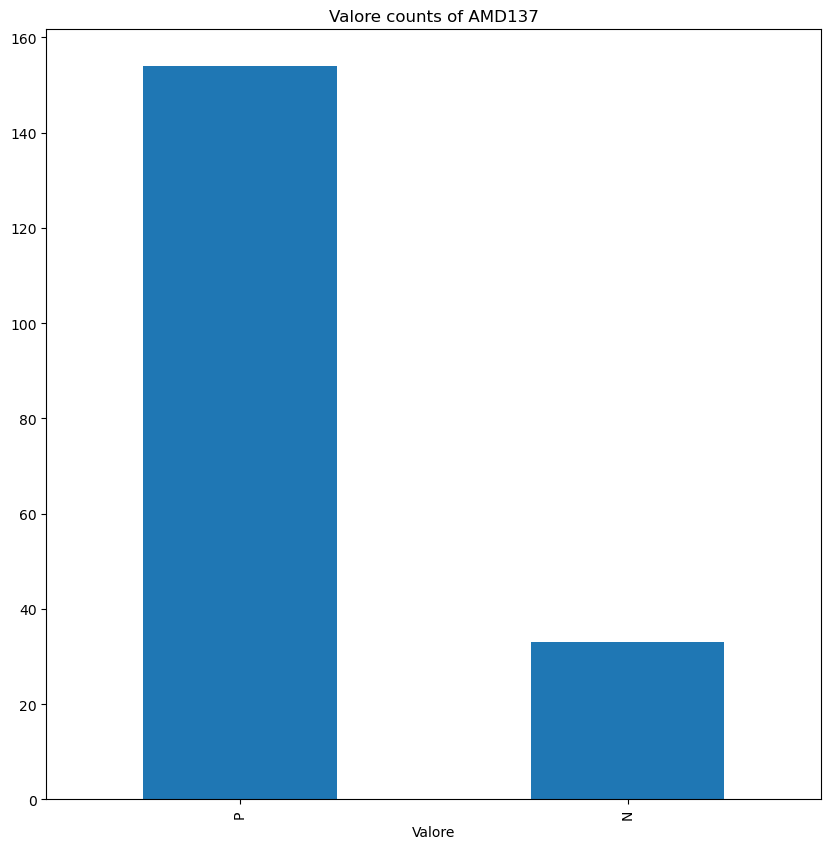

In [17]:
# count the occurrence of N and P values by codiceamd

for amd in df4["codiceamd"].dropna().unique():
    print(amd)
    a = df4[df4["codiceamd"] == amd]
    print(a["valore"].value_counts())
    a[f"valore"].value_counts().plot(
        kind="bar",
        title=f"Valore counts of {amd}",
        xlabel="Valore",
        figsize=(10, 10),
    )
    plt.show()

In [27]:
df5 = pd.read_csv("data/prescrizioninondiabete.csv", header=0, index_col=0)

<Axes: title={'center': 'Number of patients by codiceamd'}, xlabel='codiceamd'>

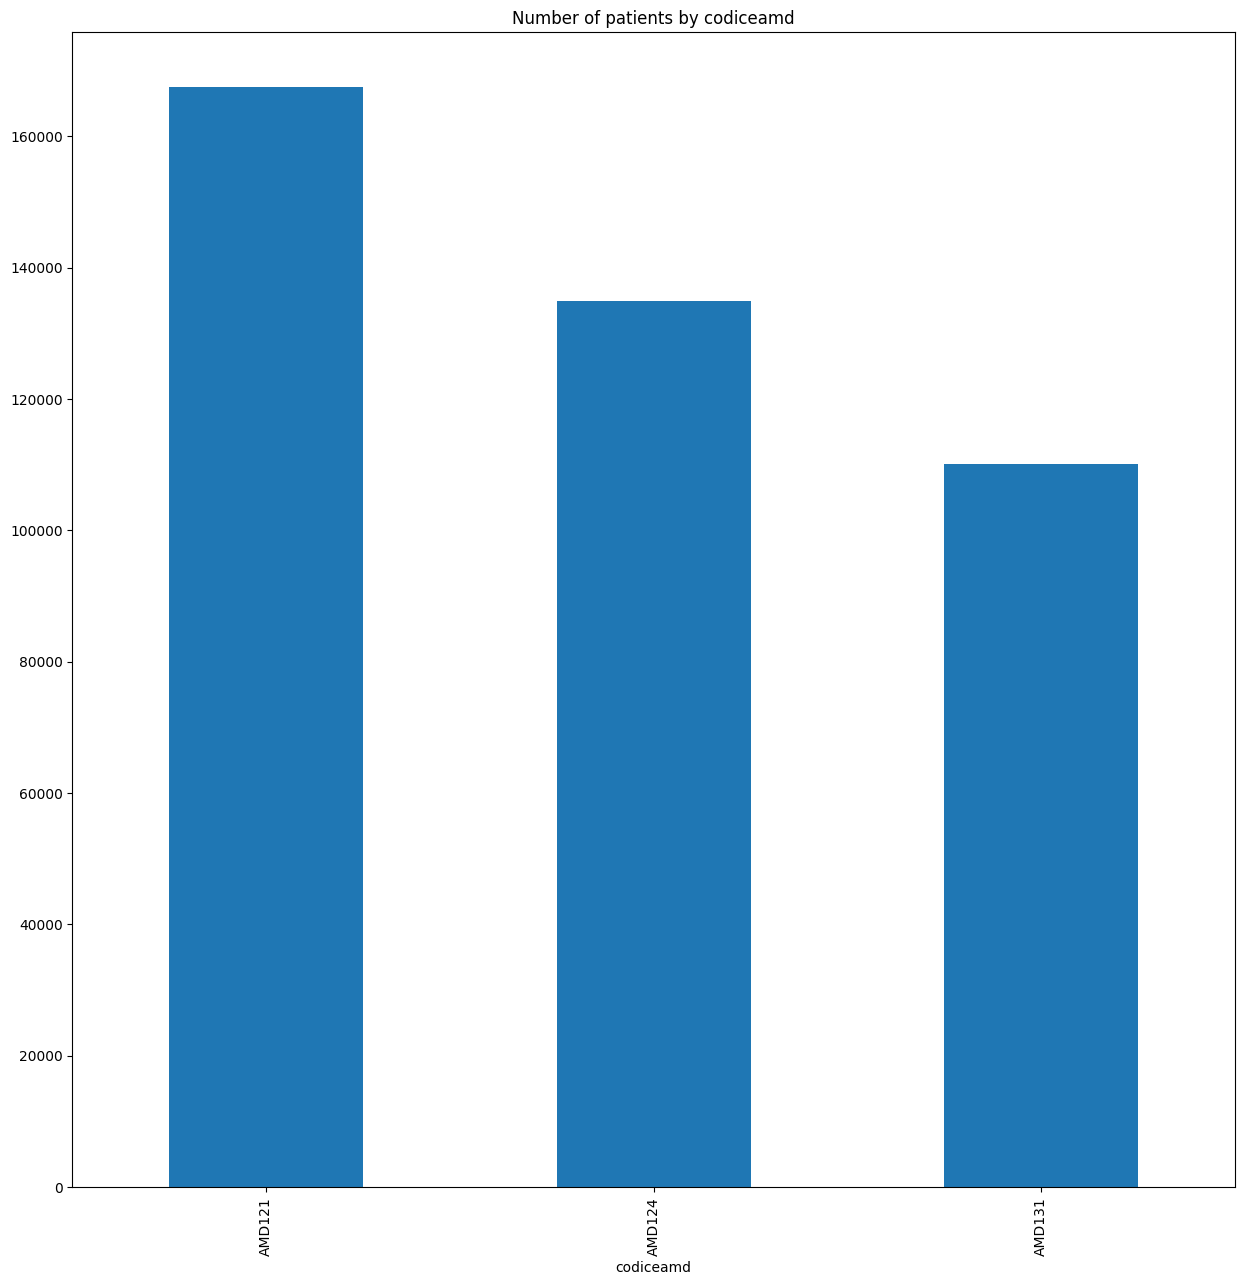

In [28]:
a = (
    df5[["idana", "idcentro", "codiceamd"]]
    .drop_duplicates()
    .groupby("codiceamd")
    .size()
    .sort_values(ascending=False)
)
# print(a)
a.plot(
    kind="bar",
    title="Number of patients by codiceamd",
    figsize=(7, 7),
)

<Axes: title={'center': 'Number of patients by valore'}, xlabel='valore'>

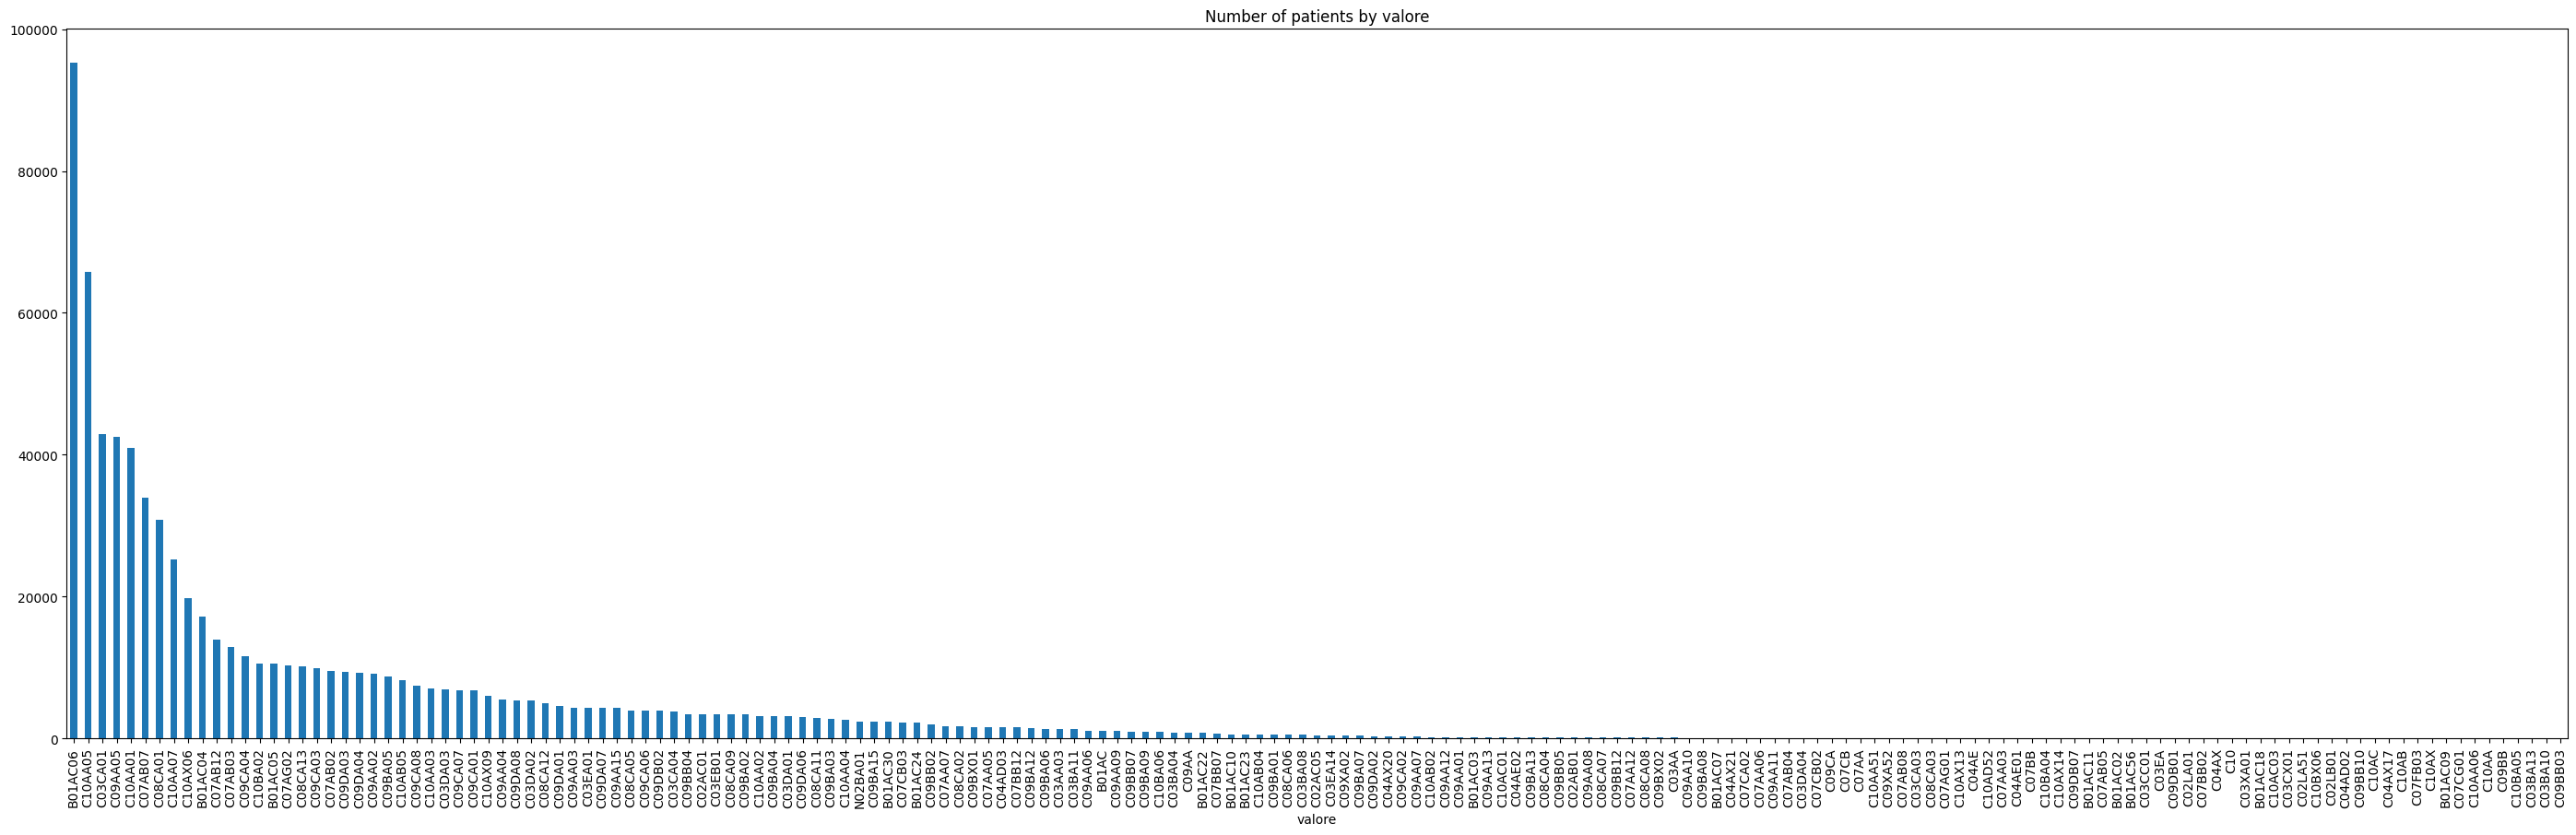

In [30]:
a = (
    df5[["idana", "idcentro", "valore"]]
    .drop_duplicates()
    .groupby("valore")
    .size()
    .sort_values(ascending=False)
)
# print(a)
a.plot(
    kind="bar",
    title="Number of patients by valore",
    figsize=(35, 10),
)

In [31]:
df6 = pd.read_csv("data/prescrizionidiabetenonfarmaci.csv", header=0, index_col=0)

<Axes: title={'center': 'Number of patients by codiceamd'}, xlabel='codiceamd'>

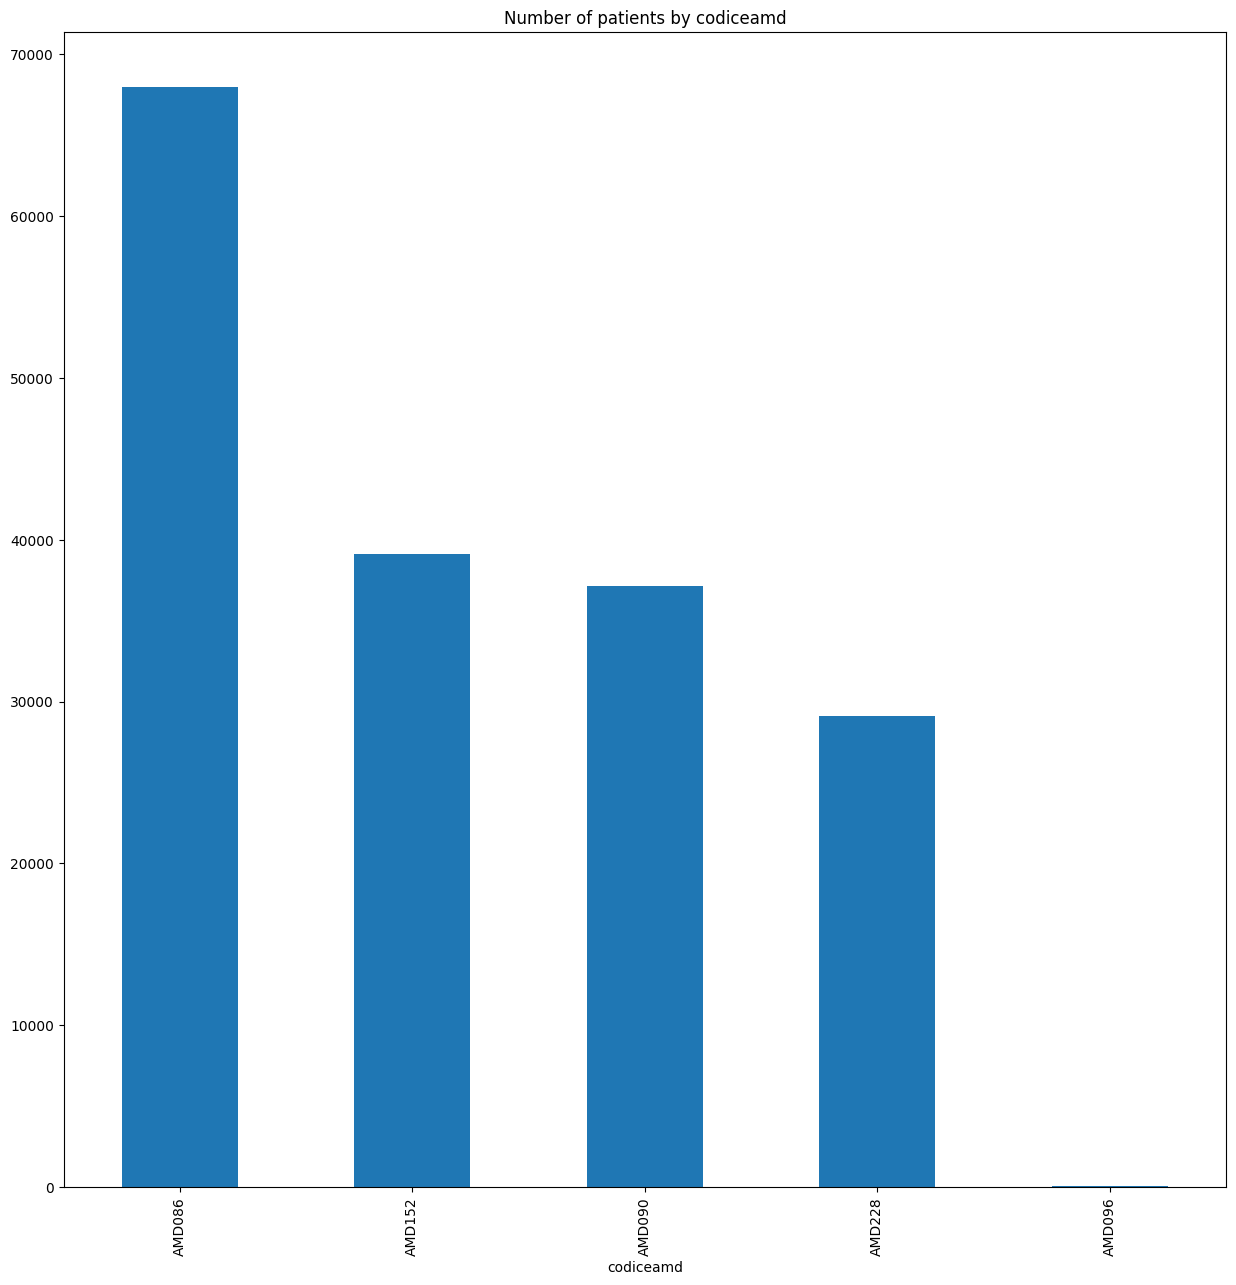

In [32]:
a = (
    df6[["idana", "idcentro", "codiceamd"]]
    .drop_duplicates()
    .groupby("codiceamd")
    .size()
    .sort_values(ascending=False)
)
# print(a)
a.plot(
    kind="bar",
    title="Number of patients by codiceamd",
    figsize=(10, 10),
)

In [33]:
df7 = pd.read_csv("data/prescrizionidiabetefarmaci.csv", header=0, index_col=0)

<Axes: title={'center': 'Number of patients by codiceatc'}, xlabel='codiceatc'>

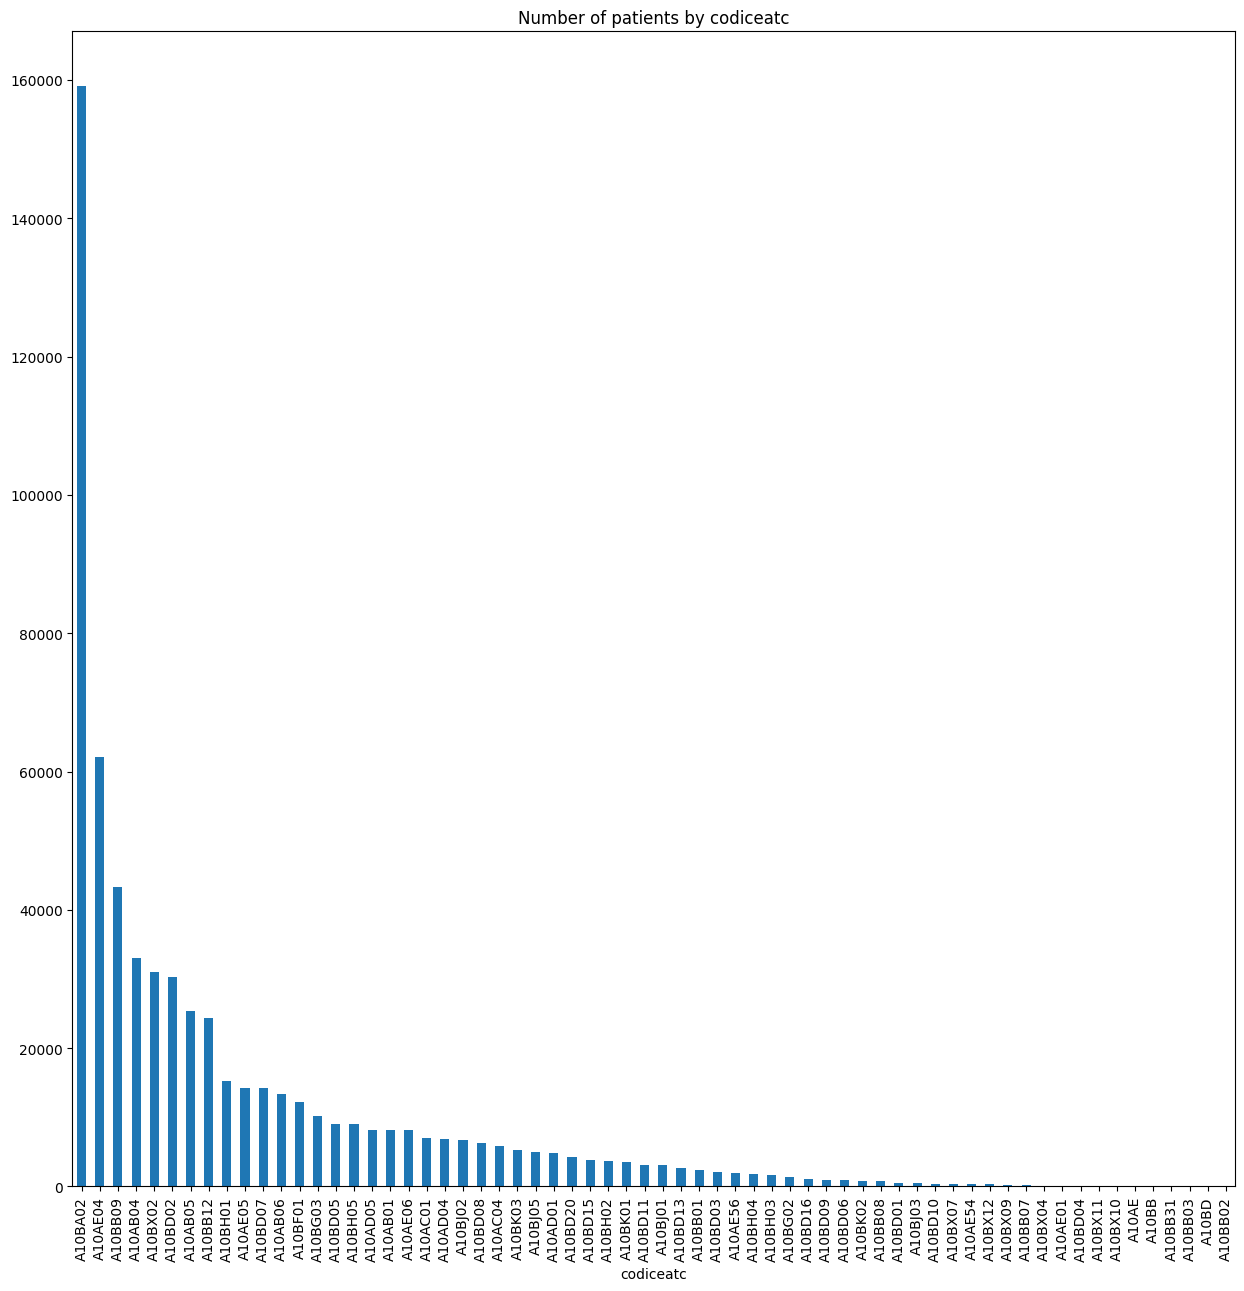

In [34]:
a = (
    df7[["idana", "idcentro", "codiceatc"]]
    .drop_duplicates()
    .groupby("codiceatc")
    .size()
    .sort_values(ascending=False)
)
# print(a)
a.plot(
    kind="bar",
    title="Number of patients by codiceatc",
    figsize=(15, 15),
)

In [ ]:
df7[df7["descrizionefarmaco"] == "Altro"]["codiceatc"].value_counts()

In [18]:
# TODO: tutti i grafici vanno rifatti per il sotto-dataset pulito ottenuto al task 1